# Time Series Data

Time series is a sequence of observations recorded at a regular time 
The frequency could be Yearly, Monthly, Daily or even milliseconds 
Not necessarily within the same interval
The data analysis for time series is inherently different compared to the other data because: 
It is time dependent 
Time series could contain trend, cycle and seasonality


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_shampoo = pd.read_csv('shampo sales.csv')

This dataset describes the monthly number of sales of shampoo over a 3 year period.

The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998)

Only one variable


In [ ]:
df_shampoo.index = range(1,37)

In [ ]:
df_shampoo.head()

Month  Sales
1  1-01  266.0
2  1-02  145.9
3  1-03  183.1
4  1-04  119.3
5  1-05  180.3

In [ ]:
df_shampoo.tail()

Month  Sales
32  3-08  407.6
33  3-09  682.0
34  3-10  475.3
35  3-11  581.3
36  3-12  646.9

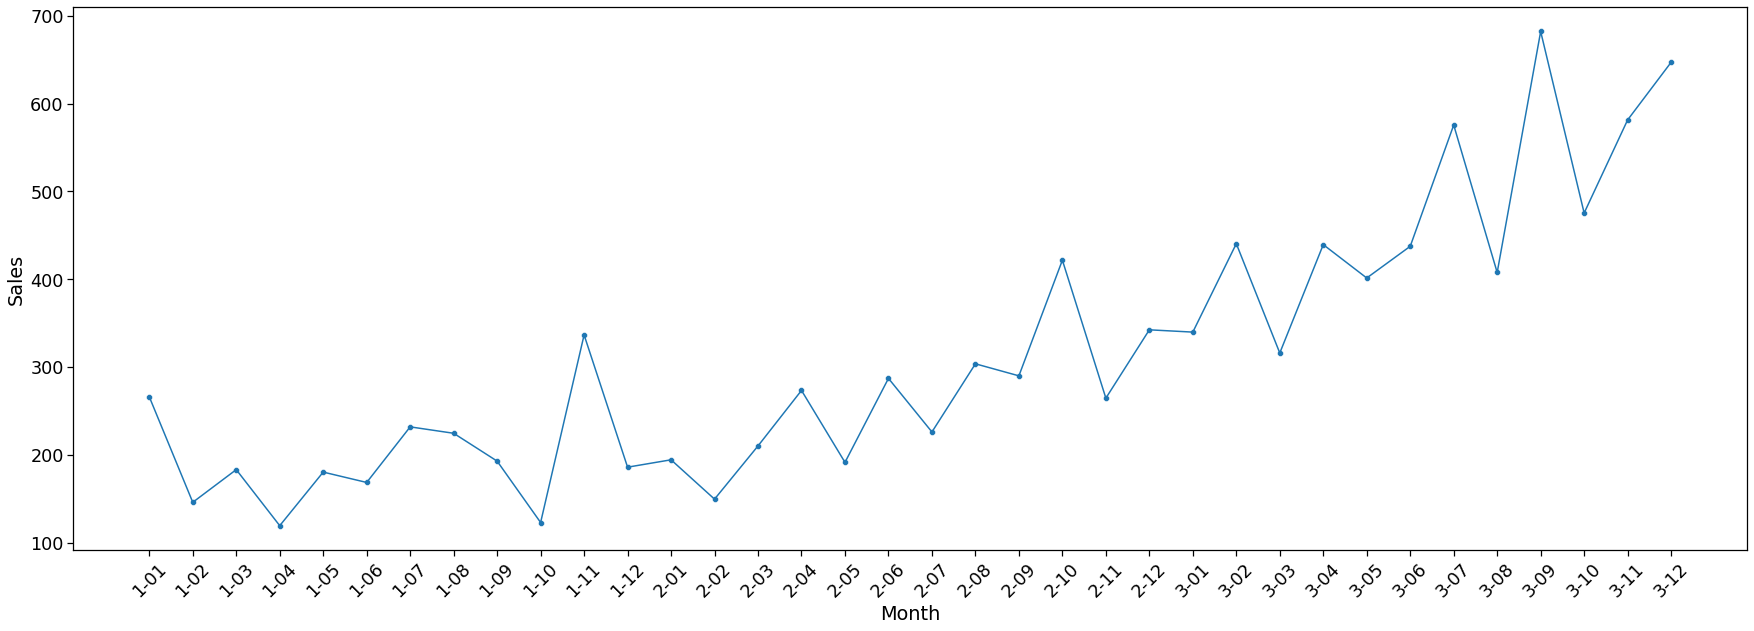

In [ ]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = df_shampoo)
sns.lineplot(x = 'Month', y = 'Sales', data = df_shampoo)

plt.xticks(rotation=45)

plt.show()

# Time Series Pattern

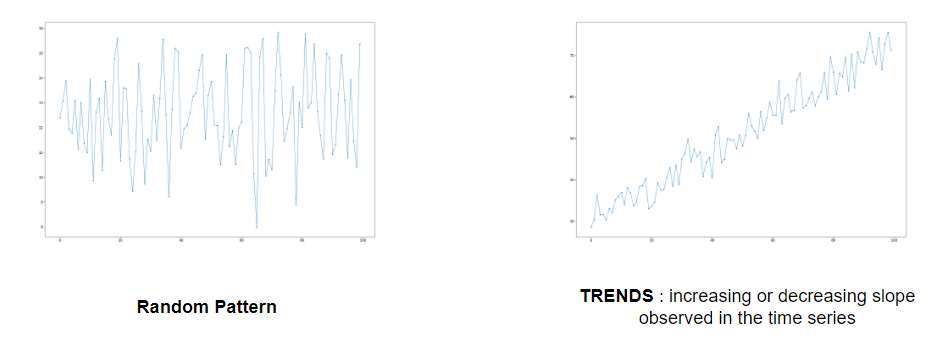

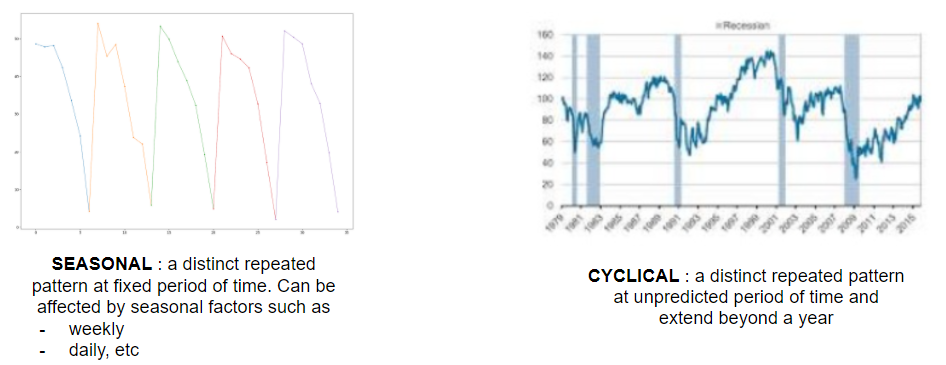

> ## Random Process

Just random pattern.

In [ ]:
y = np.random.normal(13,2,100)
indexes = range(0,100)

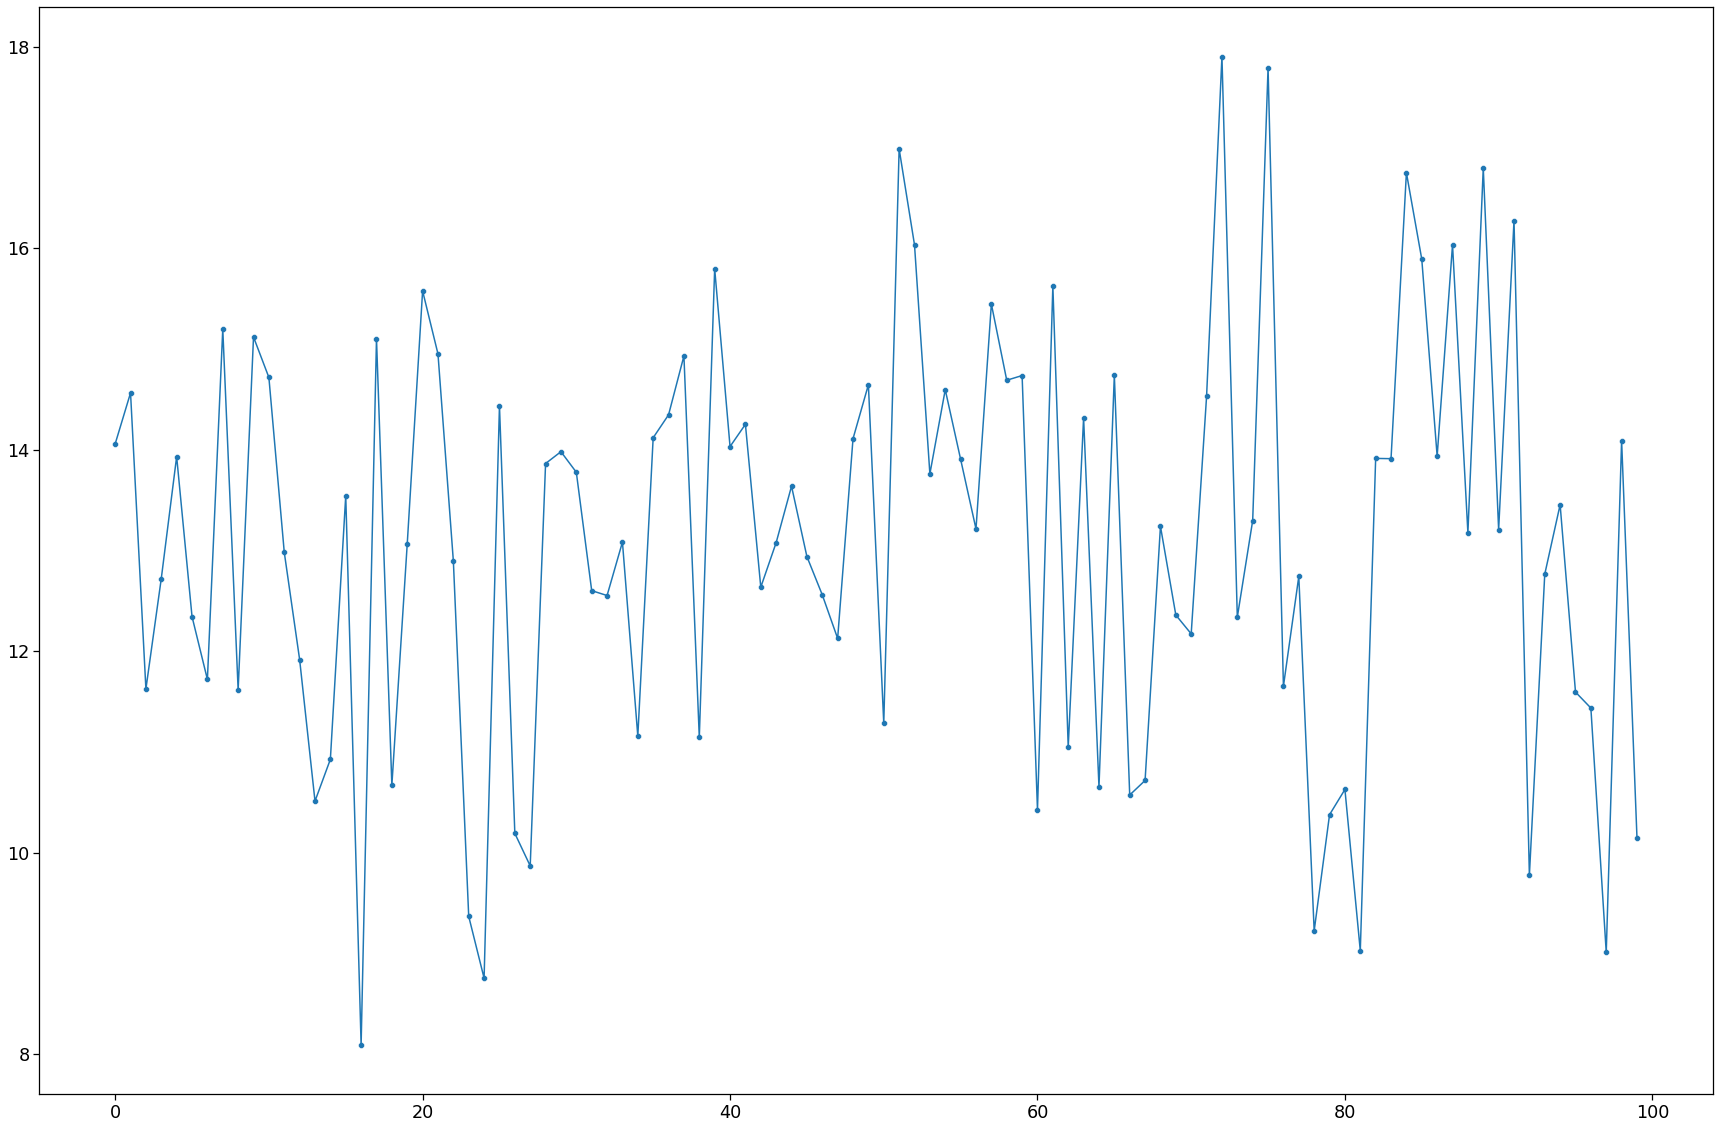

In [ ]:
plt.figure(figsize = (30,20))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = indexes, y = y)
sns.lineplot(x = indexes, y = y)

plt.show()

> ## Trends

increasing or decreasing slope observed in the time series

In [ ]:
indexes = range(0,100)
y = [30 + 0.43*i + np.random.normal(0,3,1).item() for i in indexes]

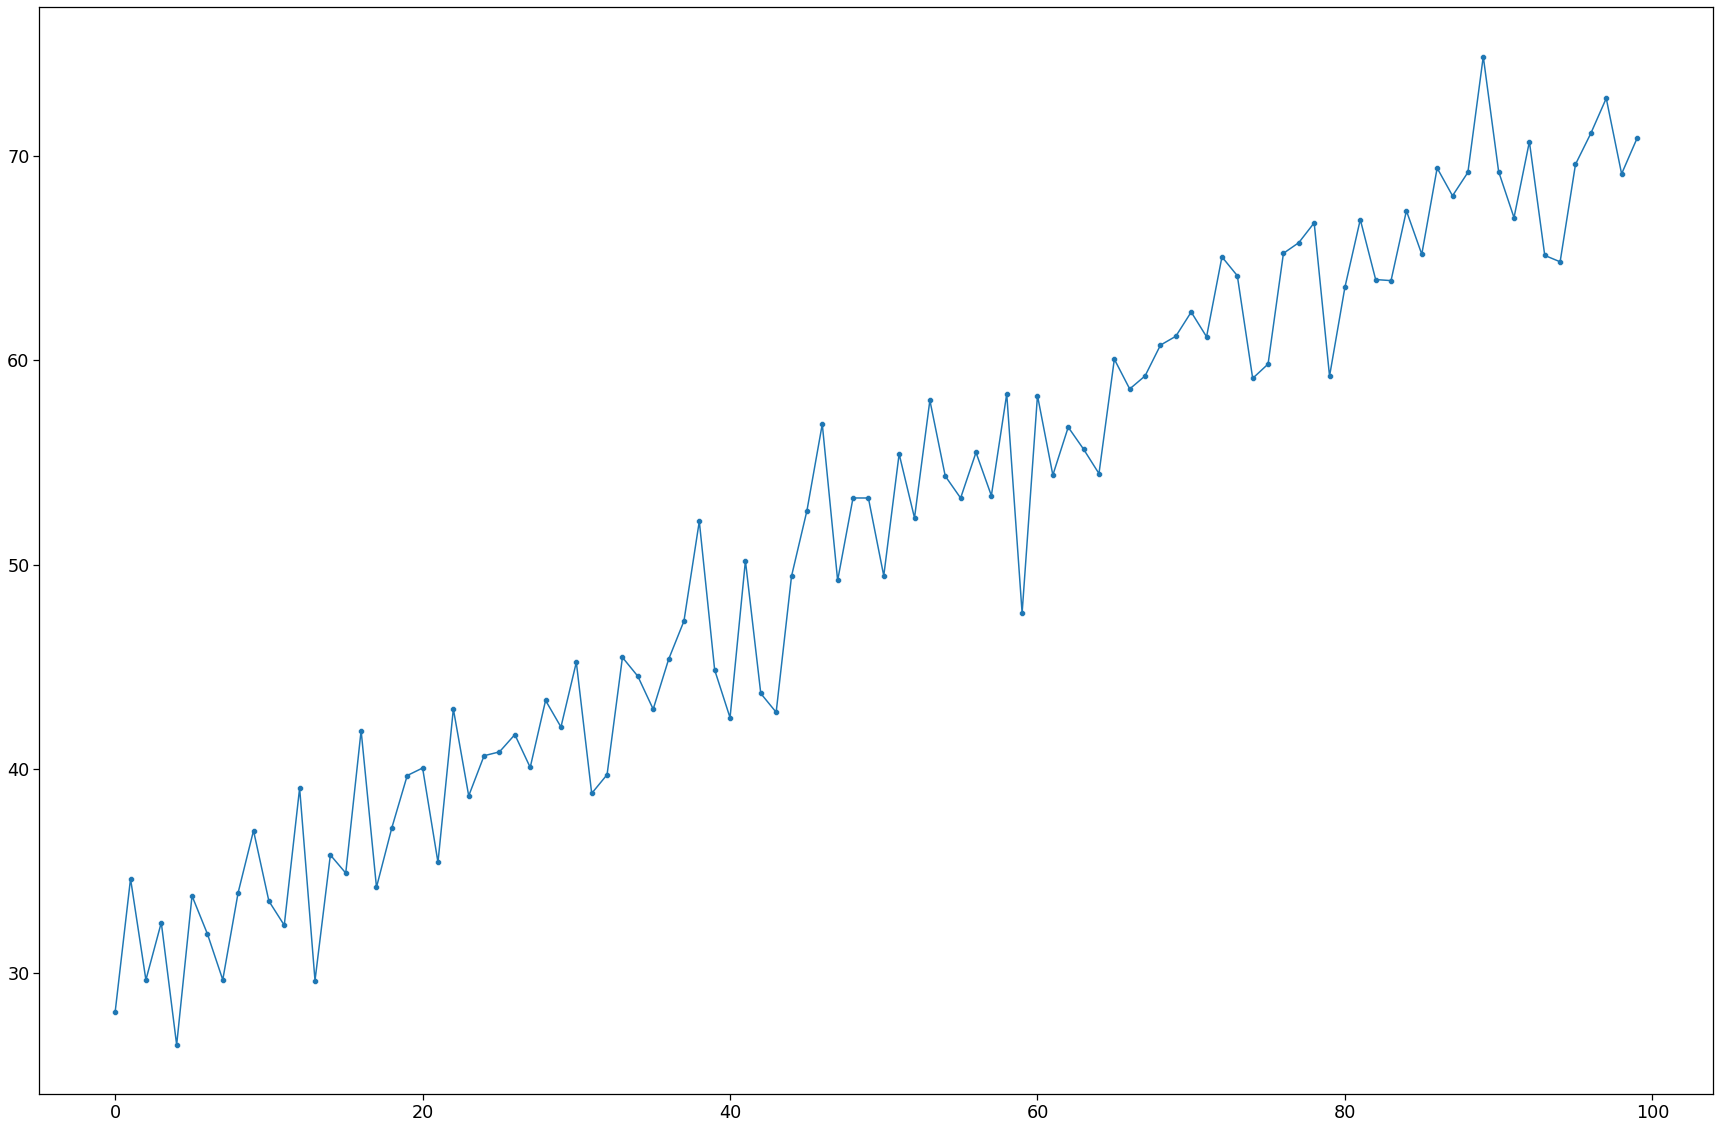

In [ ]:
plt.figure(figsize = (30,20))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = indexes, y = y)
sns.lineplot(x = indexes, y = y)

plt.show()

> ## Seasonal

 a distinct repeated pattern at fixed period of time. Can be affected by seasonal factors such as
- weekly
- daily, etc


In [ ]:
indexes = range(0,35)
y = [50 + 0.43*(i%7) - 1.3*(i%7)**2 + np.random.normal(0,3,1).item() for i in indexes]

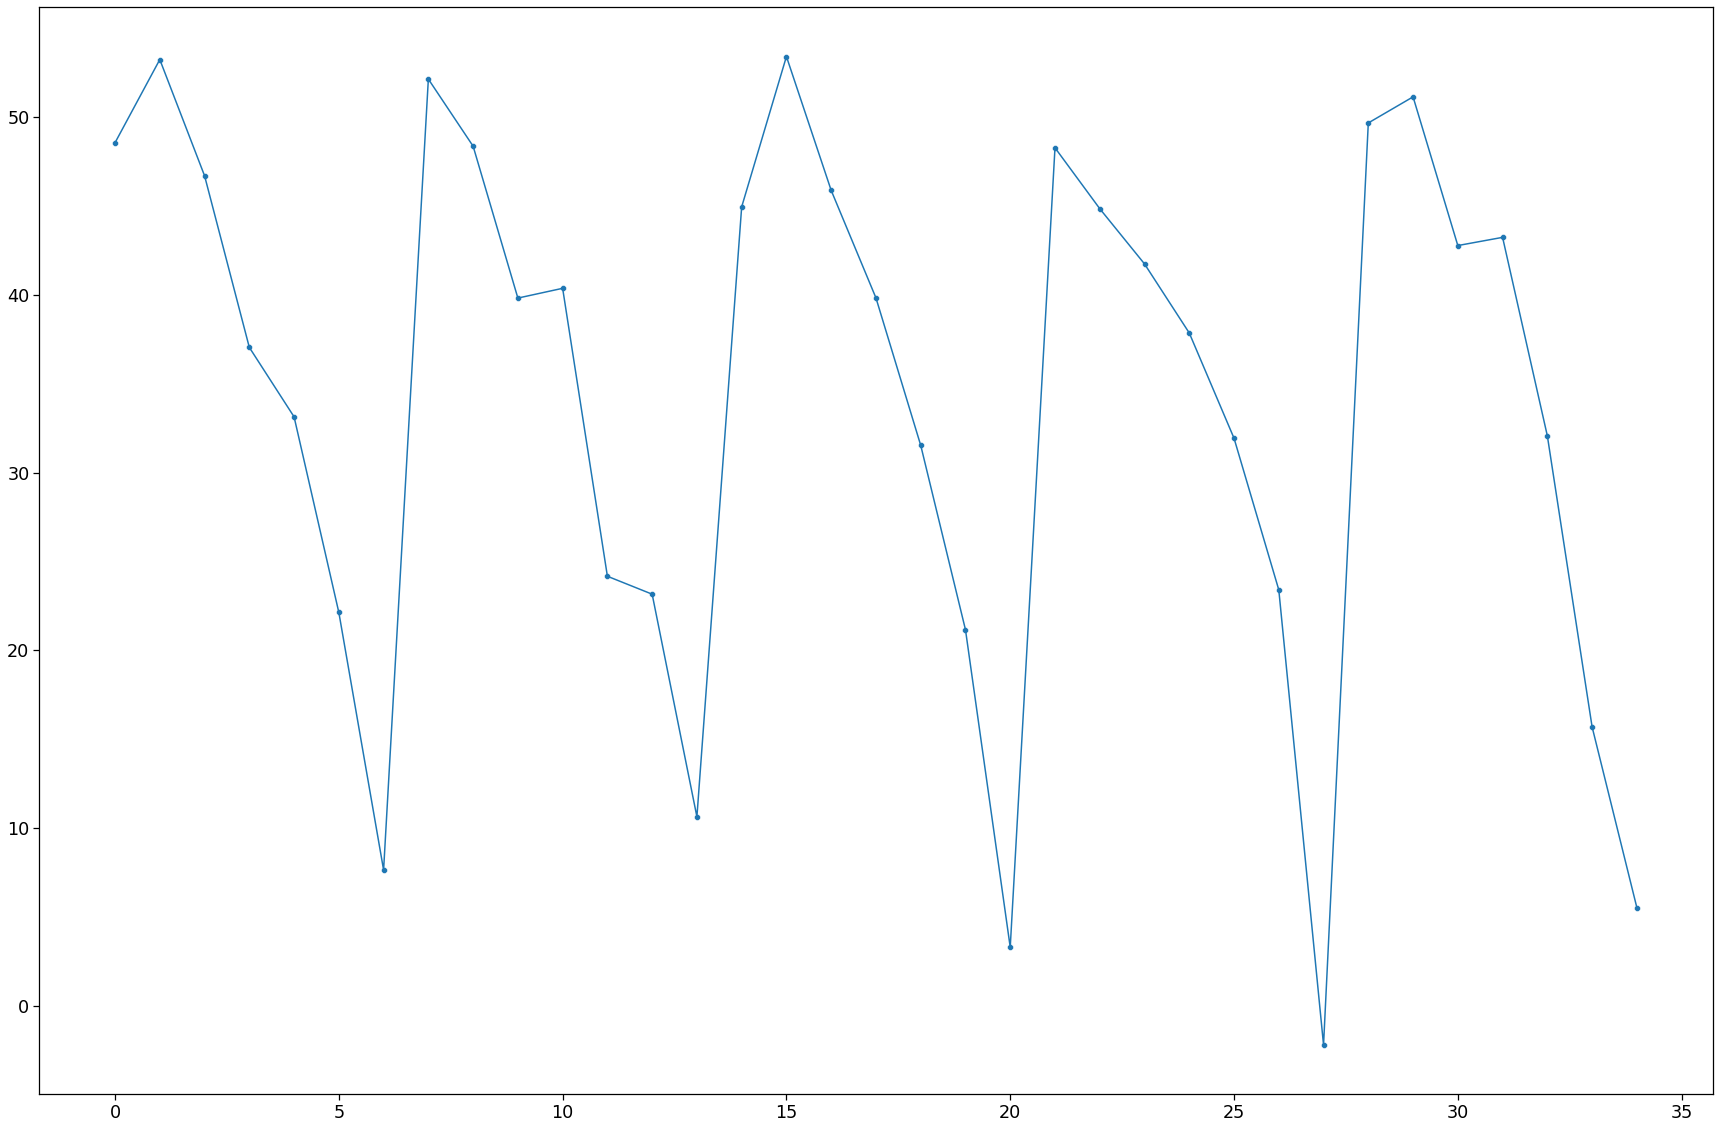

In [ ]:
plt.figure(figsize = (30,20))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = indexes, y = y)
sns.lineplot(x = indexes, y = y)

plt.show()

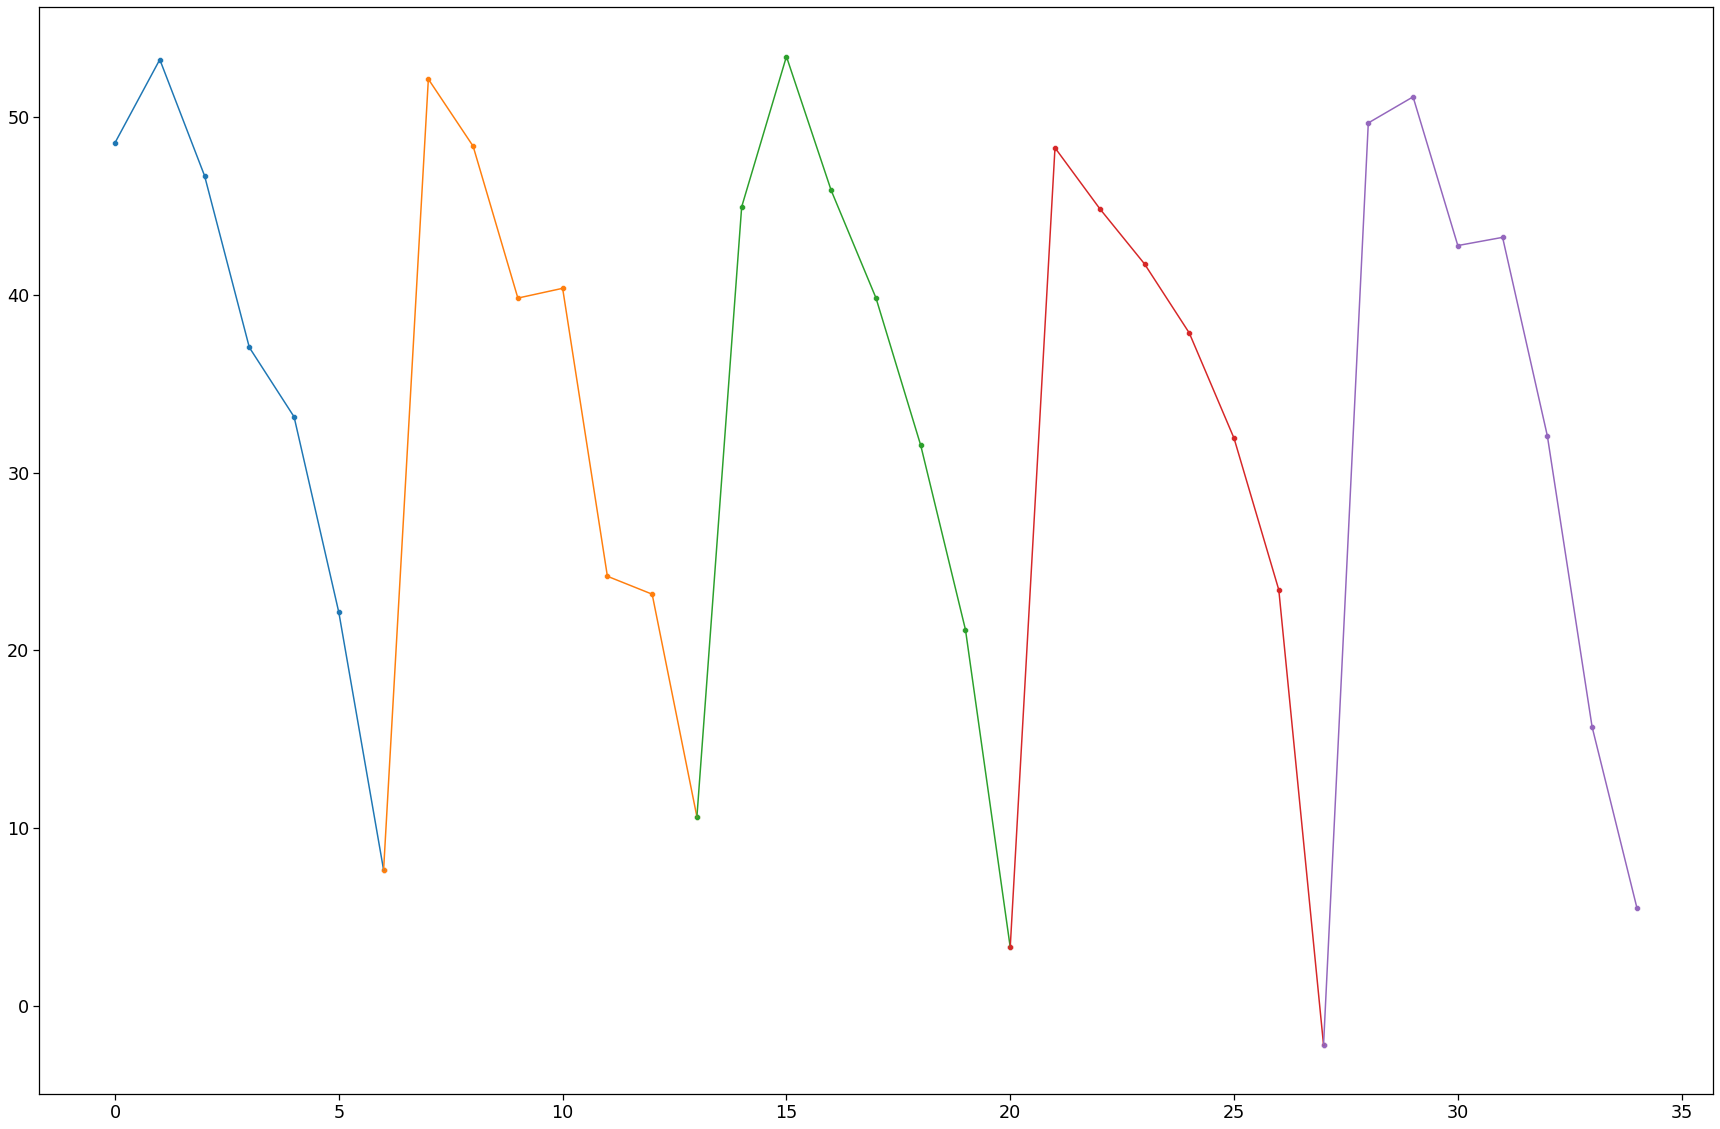

In [ ]:
plt.figure(figsize = (30,20))

sns.set_context(context = 'notebook', font_scale=1.6)

for i,j in zip([0,6,13,20,27],[7,14,21,28,35]):
  sns.scatterplot(x = indexes[i:j], y = y[i:j])
  sns.lineplot(x = indexes[i:j], y = y[i:j])

plt.show()

> ## Decomposition

In [ ]:
import plotly.graph_objects as go

In [ ]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")

In [ ]:
fig = go.Figure([go.Scatter(name = 'true',x=df['Date'], y=df['Consumption'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



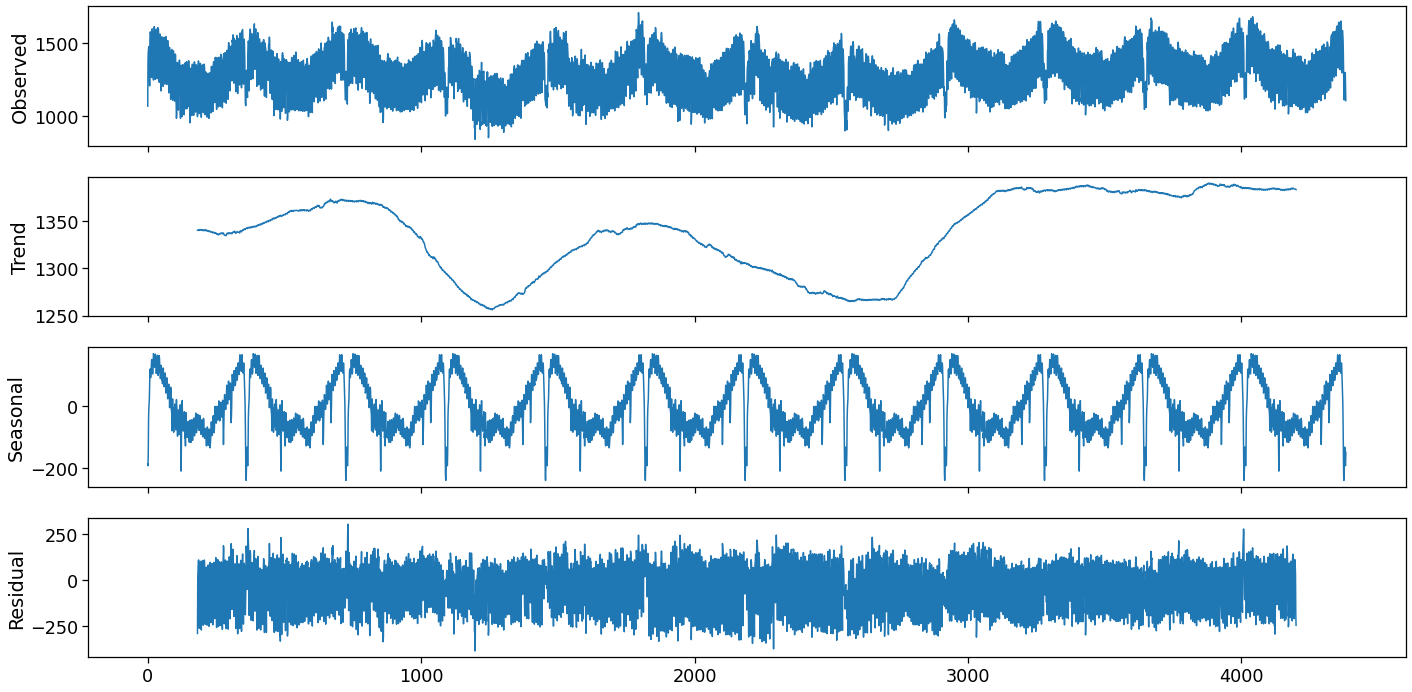

In [ ]:
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

series = df['Consumption']
result = seasonal_decompose(series, model='additive', freq = 365)
result.plot()
plt.show()

breakdown each component trend and seasonal

# Stationarity

Stationarity may has an important role in forecasting. 
Stationarity mirrors the behaviour of the process that happen in the data.
There is some forecasting method that require stationarity for good performance
There is also some method that able to achieve good performance regardless stationarity.
<br>
Stationarity :
- Mean
- Variance


> ## Stationarity - Mean

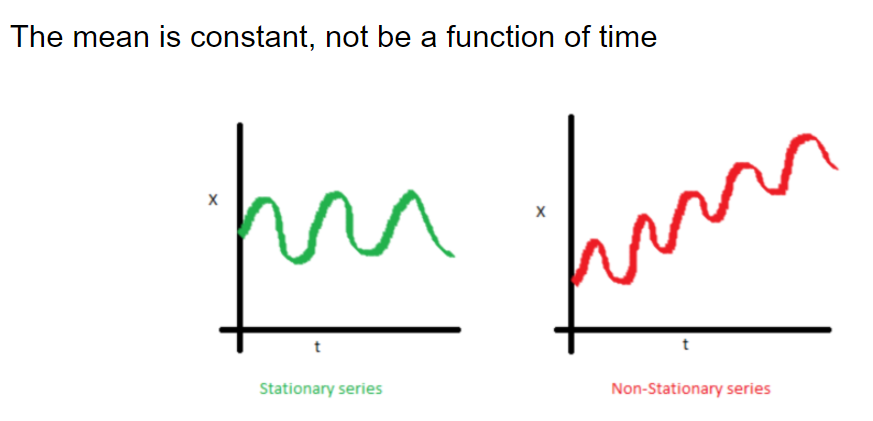

> ## Stationarity - Variance

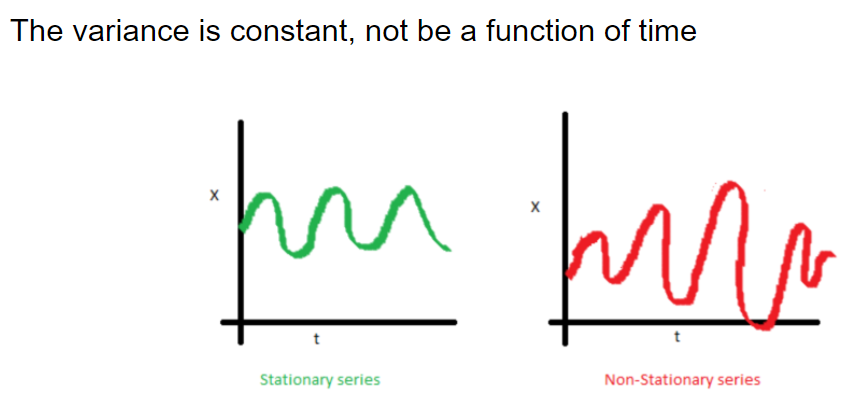

> ## Illustration

In [ ]:
df_shampoo_stationare = df_shampoo.copy() 

In [ ]:
df_shampoo_stationare['Sales Stationary'] = df_shampoo_stationare['Sales'].diff(1)
df_shampoo_stationare['Sales Stationary 2'] = df_shampoo_stationare['Sales'].diff(2)

In [ ]:
df_shampoo_stationare.head(10)

Month  Sales  Sales Stationary  Sales Stationary 2
1   1-01  266.0               NaN                 NaN
2   1-02  145.9            -120.1                 NaN
3   1-03  183.1              37.2               -82.9
4   1-04  119.3             -63.8               -26.6
5   1-05  180.3              61.0                -2.8
6   1-06  168.5             -11.8                49.2
7   1-07  231.8              63.3                51.5
8   1-08  224.5              -7.3                56.0
9   1-09  192.8             -31.7               -39.0
10  1-10  122.9             -69.9              -101.6

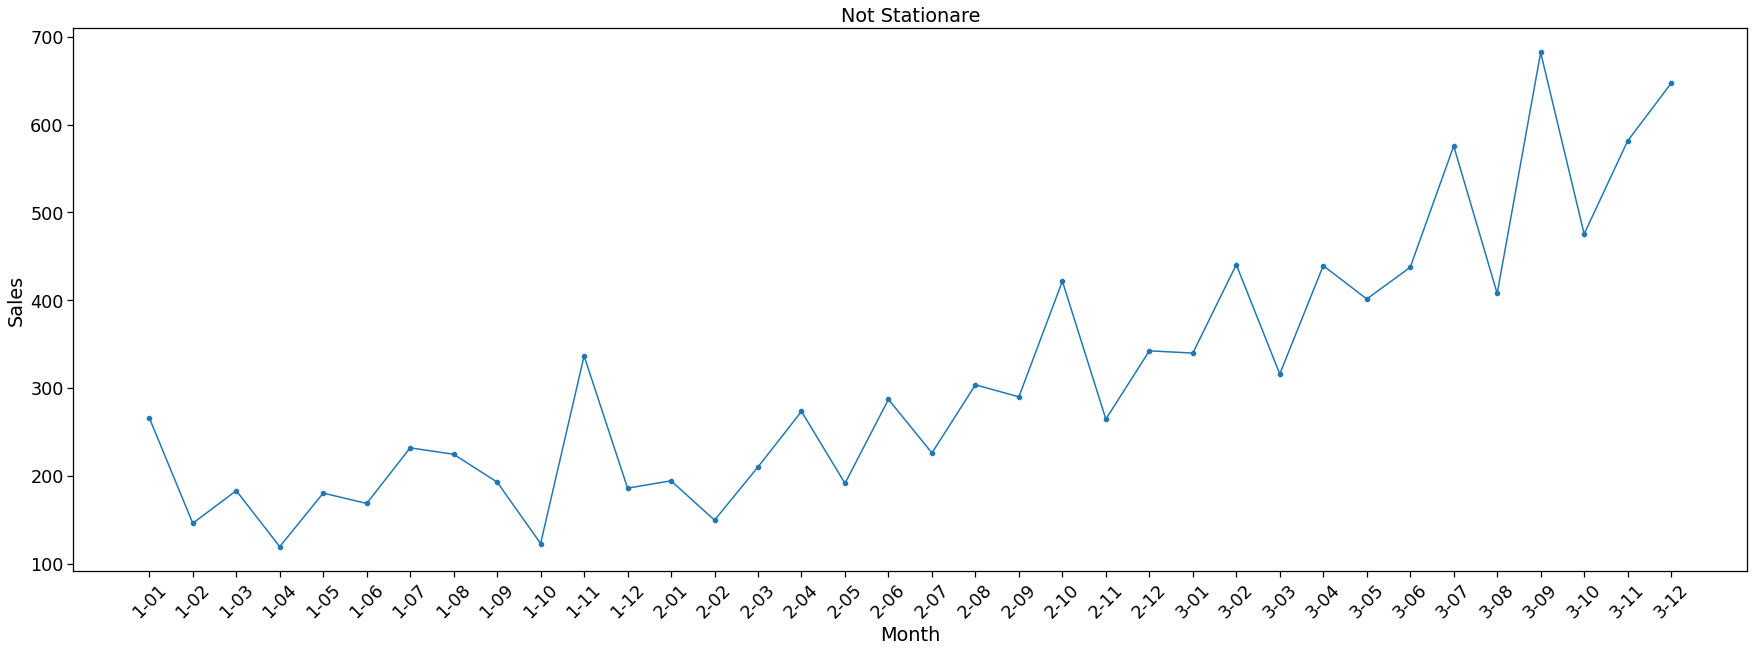

In [ ]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = df_shampoo)
sns.lineplot(x = 'Month', y = 'Sales', data = df_shampoo)

plt.title('Not Stationare')
plt.xticks(rotation=45)

plt.show()

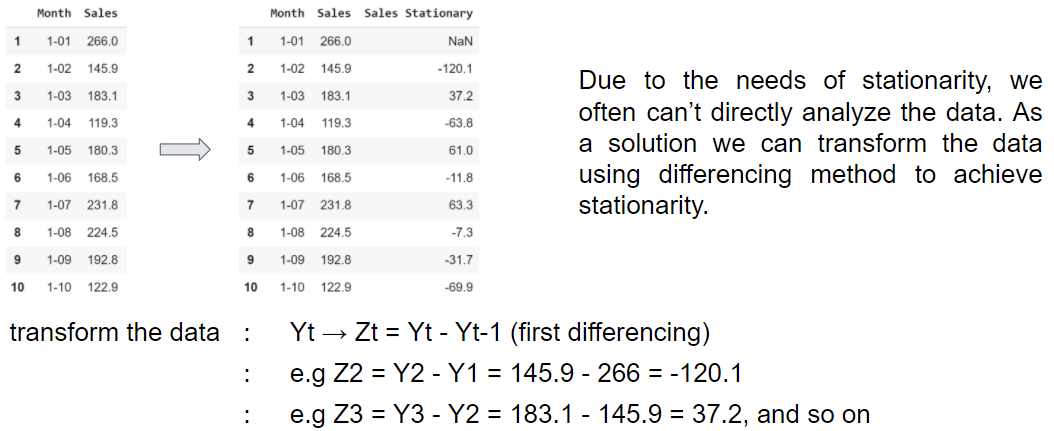

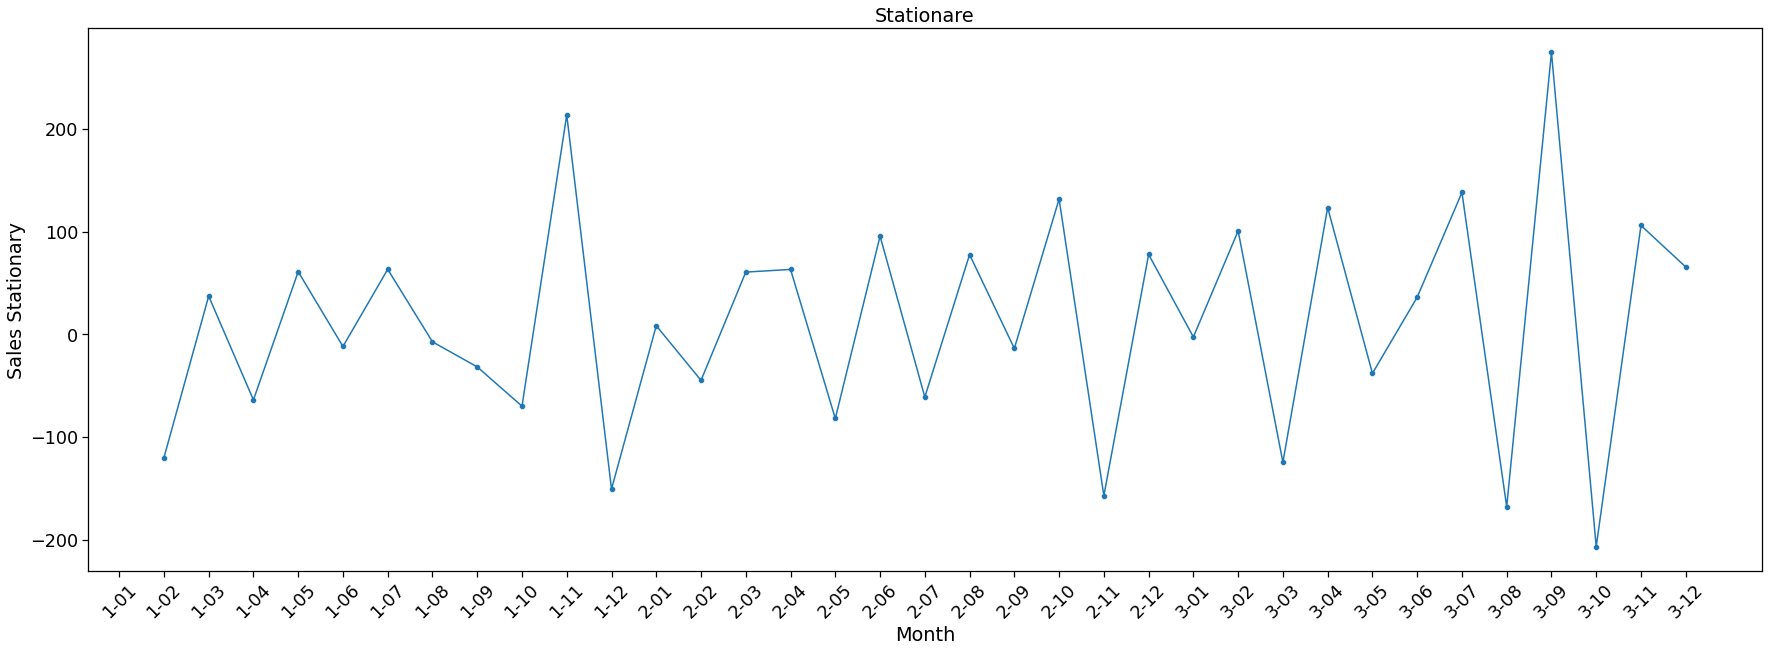

In [ ]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales Stationary', data = df_shampoo_stationare)
sns.lineplot(x = 'Month', y = 'Sales Stationary', data = df_shampoo_stationare)

plt.title('Stationare')
plt.xticks(rotation=45)

plt.show()

# ARIMA Illustration

> ## Autoregressive (AR) : p

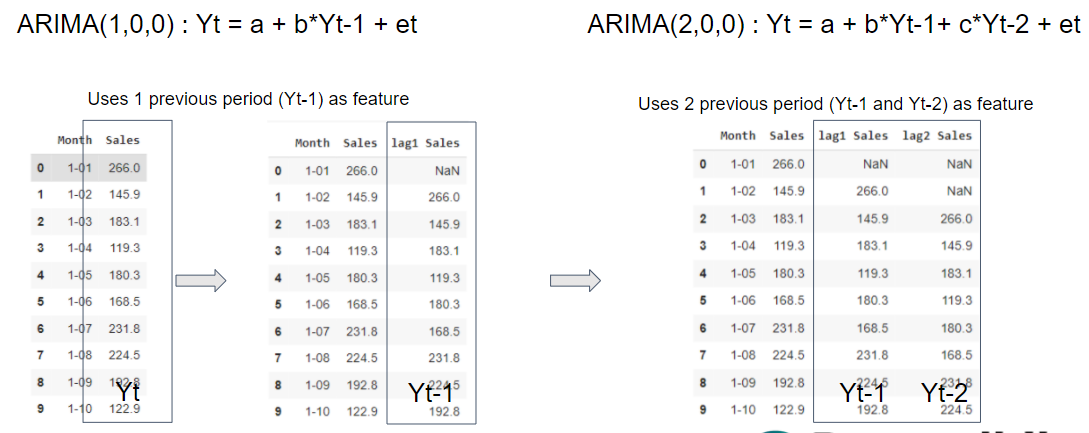

ARIMA (1,0,0) illustration

In [ ]:
df_shampoo_ar = df_shampoo.copy() 

In [ ]:
df_shampoo_ar.head(10)

Month  Sales
1   1-01  266.0
2   1-02  145.9
3   1-03  183.1
4   1-04  119.3
5   1-05  180.3
6   1-06  168.5
7   1-07  231.8
8   1-08  224.5
9   1-09  192.8
10  1-10  122.9

In [ ]:
df_shampoo_ar['lag1 Sales'] = df_shampoo_ar['Sales'].shift(1)

In [ ]:
df_shampoo_ar.head(10)

Month  Sales  lag1 Sales
1   1-01  266.0         NaN
2   1-02  145.9       266.0
3   1-03  183.1       145.9
4   1-04  119.3       183.1
5   1-05  180.3       119.3
6   1-06  168.5       180.3
7   1-07  231.8       168.5
8   1-08  224.5       231.8
9   1-09  192.8       224.5
10  1-10  122.9       192.8

ARIMA (2,0,0) illustration

In [ ]:
df_shampoo_ar['lag2 Sales'] = df_shampoo_ar['Sales'].shift(2)

In [ ]:
df_shampoo_ar.head(10)

Month  Sales  lag1 Sales  lag2 Sales
1   1-01  266.0         NaN         NaN
2   1-02  145.9       266.0         NaN
3   1-03  183.1       145.9       266.0
4   1-04  119.3       183.1       145.9
5   1-05  180.3       119.3       183.1
6   1-06  168.5       180.3       119.3
7   1-07  231.8       168.5       180.3
8   1-08  224.5       231.8       168.5
9   1-09  192.8       224.5       231.8
10  1-10  122.9       192.8       224.5

> ## Integrated (I) : d

ARIMA (1,1,0) illustration

In [ ]:
df_shampoo_i = df_shampoo.copy()

In [ ]:
df_shampoo_i['lag1 Sales'] = df_shampoo_i['Sales'].shift(1)
df_shampoo_i['Sales Stationary'] = df_shampoo_i['Sales'] - df_shampoo_i['lag1 Sales']
df_shampoo_i['lag1 Sales Stationary'] = df_shampoo_i['Sales Stationary'].shift(1)
df_shampoo_i.head(10)

Month  Sales  lag1 Sales  Sales Stationary  lag1 Sales Stationary
1   1-01  266.0         NaN               NaN                    NaN
2   1-02  145.9       266.0            -120.1                    NaN
3   1-03  183.1       145.9              37.2                 -120.1
4   1-04  119.3       183.1             -63.8                   37.2
5   1-05  180.3       119.3              61.0                  -63.8
6   1-06  168.5       180.3             -11.8                   61.0
7   1-07  231.8       168.5              63.3                  -11.8
8   1-08  224.5       231.8              -7.3                   63.3
9   1-09  192.8       224.5             -31.7                   -7.3
10  1-10  122.9       192.8             -69.9                  -31.7

> ## Moving Average (MA) : q


ARIMA (0,0,1) illustration

In [ ]:
df_shampoo_ma = df_shampoo.copy()

In [ ]:
df_shampoo_ma.head(10)

Month  Sales
1   1-01  266.0
2   1-02  145.9
3   1-03  183.1
4   1-04  119.3
5   1-05  180.3
6   1-06  168.5
7   1-07  231.8
8   1-08  224.5
9   1-09  192.8
10  1-10  122.9

In [ ]:
df_shampoo_ma['et = sales - mean(sales)'] = df_shampoo_ma['Sales'] - df_shampoo_ma['Sales'].mean() 
df_shampoo_ma['lag1 et = sales - mean(sales)'] = df_shampoo_ma['et = sales - mean(sales)'].shift(1)
df_shampoo_ma.drop('et = sales - mean(sales)', axis = 1, inplace = True)

In [ ]:
df_shampoo_ma.head(10)

Month  Sales  lag1 et = sales - mean(sales)
1   1-01  266.0                            NaN
2   1-02  145.9                          -46.6
3   1-03  183.1                         -166.7
4   1-04  119.3                         -129.5
5   1-05  180.3                         -193.3
6   1-06  168.5                         -132.3
7   1-07  231.8                         -144.1
8   1-08  224.5                          -80.8
9   1-09  192.8                          -88.1
10  1-10  122.9                         -119.8

ARIMA (1,0,1) illustration

In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
df_shampoo_ma = df_shampoo.copy()

In [ ]:
df_shampoo_ma['lag1 Sales'] = df_shampoo_ma['Sales'].shift(1) 

In [ ]:
df_shampoo_ma.head(10)

Month  Sales  lag1 Sales
1   1-01  266.0         NaN
2   1-02  145.9       266.0
3   1-03  183.1       145.9
4   1-04  119.3       183.1
5   1-05  180.3       119.3
6   1-06  168.5       180.3
7   1-07  231.8       168.5
8   1-08  224.5       231.8
9   1-09  192.8       224.5
10  1-10  122.9       192.8

In [ ]:
sm_lm = OLS(df_shampoo_ma[1:]['Sales'], sm.add_constant(df_shampoo_ma[1:][['lag1 Sales']]))
result = sm_lm.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     35.42
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.11e-06
Time:                        02:32:28   Log-Likelihood:                -211.98
No. Observations:                  35   AIC:                             428.0
Df Residuals:                      33   BIC:                             431.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0456     43.525      1.793      0.0

In [ ]:
df_shampoo_ma['et-1'] = [np.nan] + list(result.resid)

In [ ]:
df_shampoo_ma.head(10)

Month  Sales  lag1 Sales        et-1
1   1-01  266.0         NaN         NaN
2   1-02  145.9       266.0 -139.193703
3   1-03  183.1       145.9   -8.510723
4   1-04  119.3       183.1 -101.266317
5   1-05  180.3       119.3    9.394083
6   1-06  168.5       180.3  -49.886864
7   1-07  231.8       168.5   22.597975
8   1-08  224.5       231.8  -33.973237
9   1-09  192.8       224.5  -59.991091
10  1-10  122.9       192.8 -105.216566

# ACF-PACF

We can use ACF-PACF to determine the best combination of p d and q.
ACF is a measured of the correlation between the time series and their own lags.
PACF measures the correlation between the time series with their own lags but partially.

Model Specification (stationary condition) :
1. PACF Cut off lag p, ACF Tails Off --> AR(p)
1. ACF Cut off lag q, PACF Tails Off --> MA(q)
1. PACF Cut off lag p, ACF Cut off lag q --> AR(p) or MA(q)
1. ACF and PACF tails off -->  choose all possible combination

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

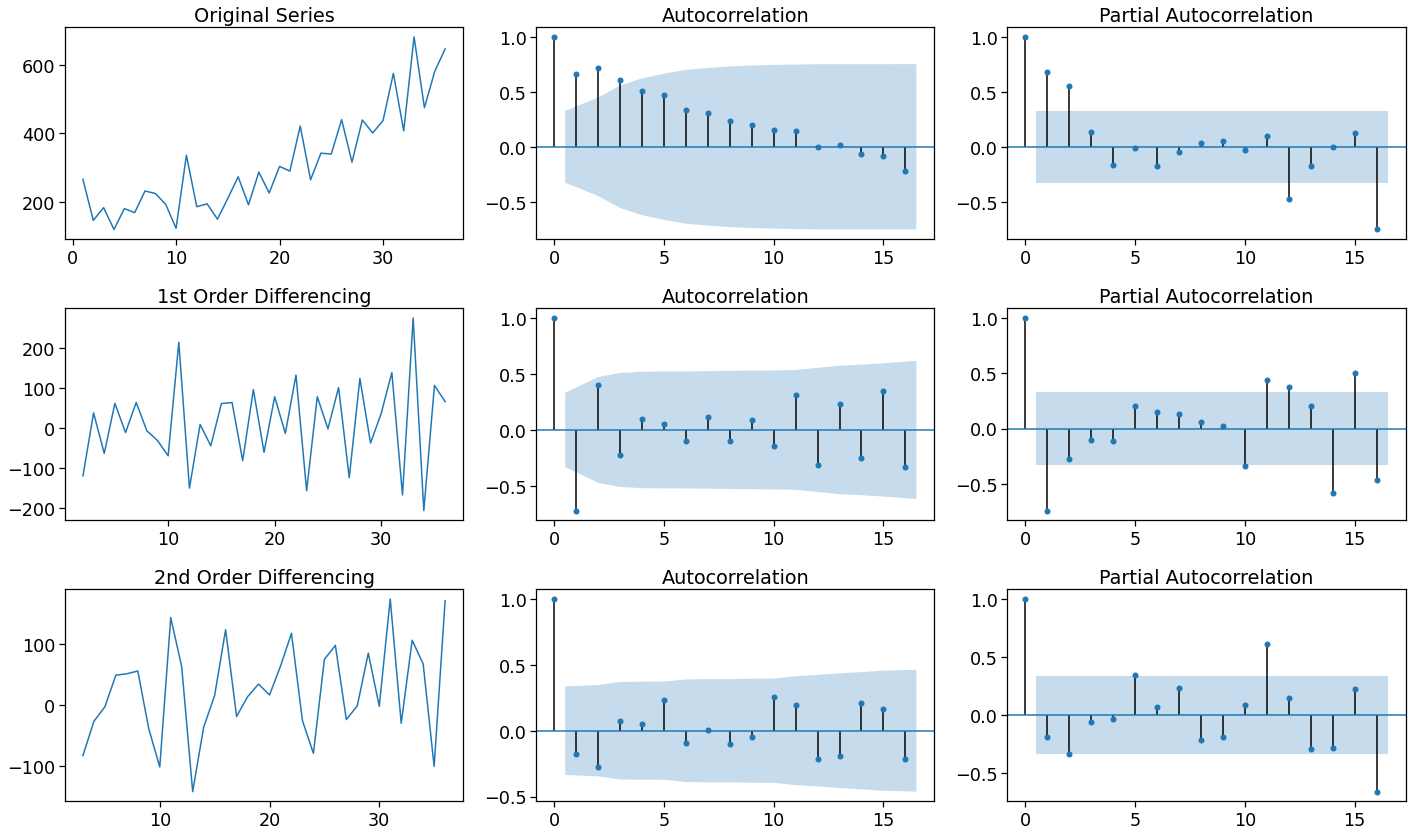

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df_shampoo_i['Sales']); axes[0, 0].set_title('Original Series')
plot_acf(df_shampoo_i['Sales'], ax=axes[0, 1])
plot_pacf(df_shampoo_i['Sales'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df_shampoo_i['Sales'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_shampoo_i['Sales'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df_shampoo_i['Sales'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df_shampoo_i['Sales'].diff(2)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_shampoo_i['Sales'].diff(2).dropna(), ax=axes[2, 1])
plot_pacf(df_shampoo_i['Sales'].diff(2).dropna(), ax=axes[2, 2])

plt.tight_layout()
plt.show()

Model Candidates Based on ACF PACF :
1. ARIMA(2,1,0)
1. ARIMA(0,1,2)

# Time Series ARIMA

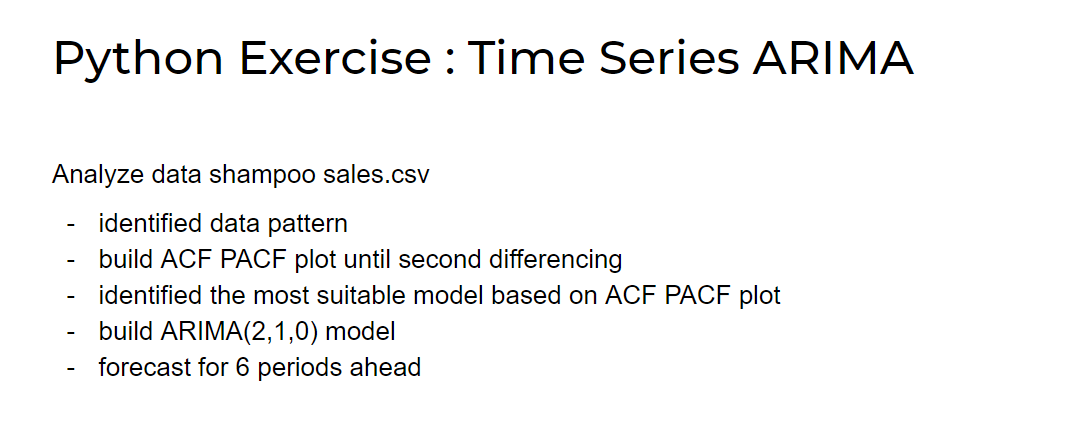

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

> ## Data

In [ ]:
df_shampoo = pd.read_csv('shampo sales.csv')

In [ ]:
df_shampoo.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

In [ ]:
df_shampoo.tail()

Month  Sales
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9

> ## EDA

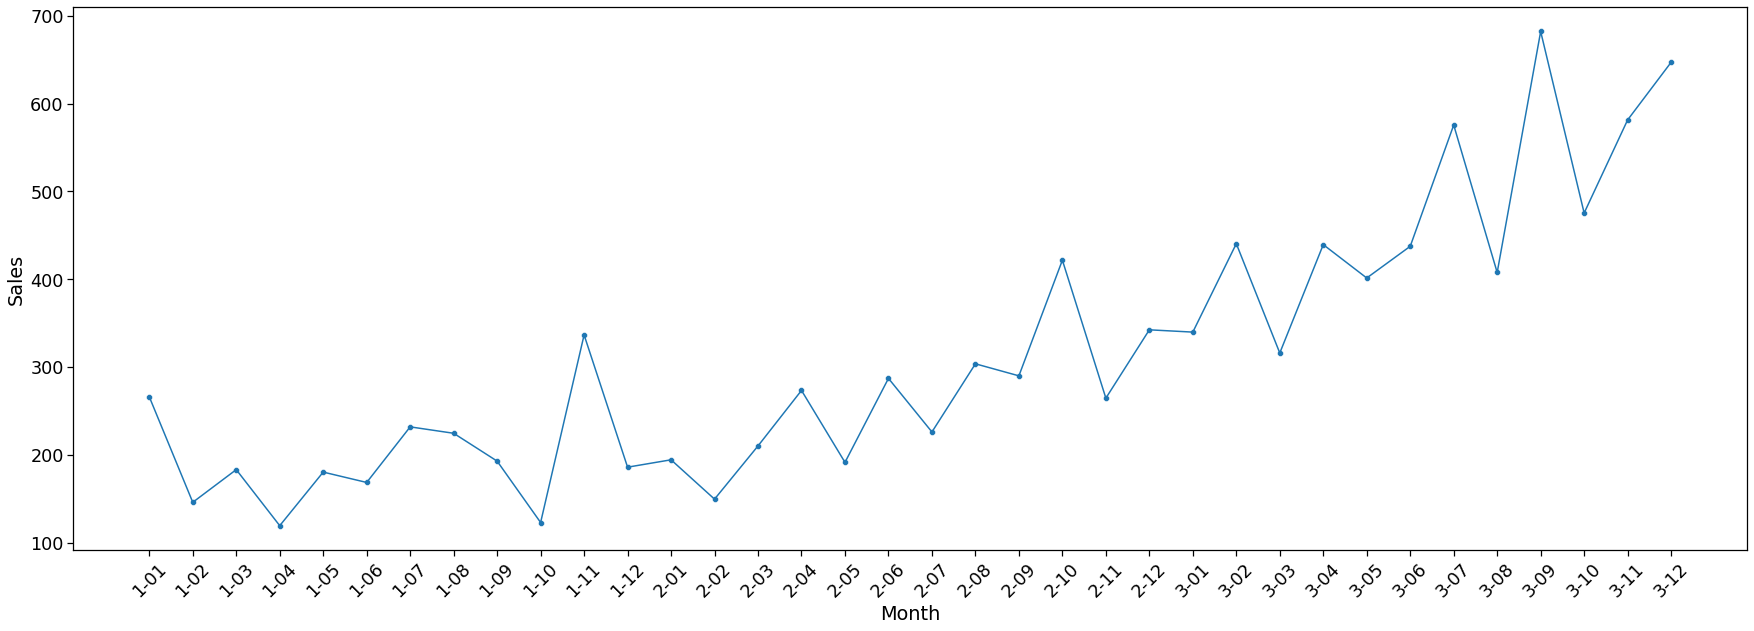

In [ ]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = df_shampoo)
sns.lineplot(x = 'Month', y = 'Sales', data = df_shampoo)

plt.xticks(rotation=45)

plt.show()

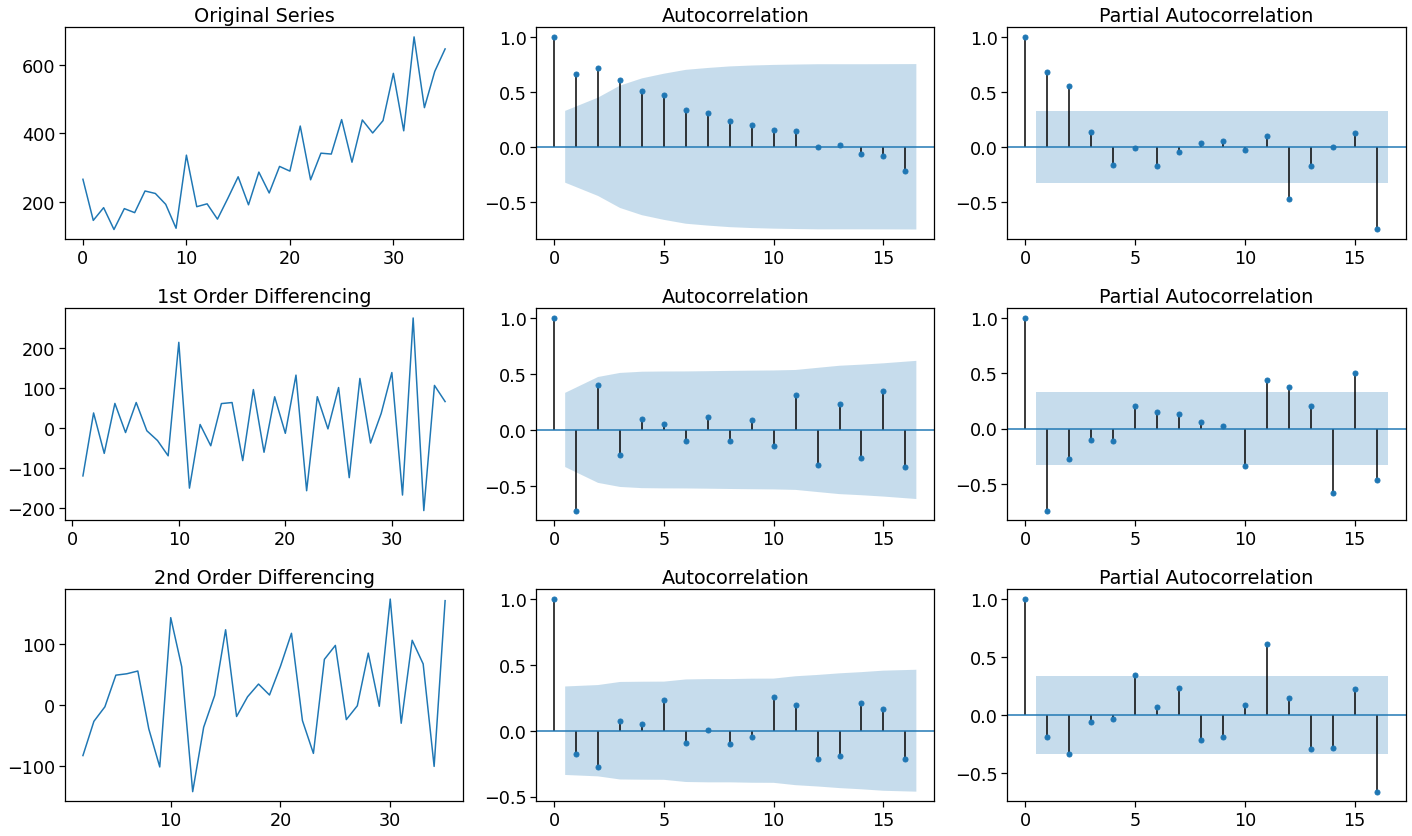

In [ ]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df_shampoo['Sales']); axes[0, 0].set_title('Original Series')
plot_acf(df_shampoo['Sales'], ax=axes[0, 1])
plot_pacf(df_shampoo['Sales'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df_shampoo['Sales'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_shampoo['Sales'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df_shampoo['Sales'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df_shampoo['Sales'].diff(2)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_shampoo['Sales'].diff(2).dropna(), ax=axes[2, 1])
plot_pacf(df_shampoo['Sales'].diff(2).dropna(), ax=axes[2, 2])

plt.tight_layout()
plt.show()

> ## Modeling

Candidates :
1. ARIMA(2,1,0)
2. ARIMA(0,1,2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df_shampoo['Sales'], order = (2,1,0))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.814
Method:                       css-mle   S.D. of innovations             67.833
Date:                Wed, 14 Oct 2020   AIC                            403.628
Time:                        02:32:47   BIC                            409.849
Sample:                             1   HQIC                           405.775
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6504      4.907      2.374      0.024       2.034      21.267
ar.L1.D.Sales    -1.0223      0.167     -6.109      0.000      -1.350      -0.694
ar.L2.D.Sales    -0.3655      0.167     

> ## Forecasting

In [ ]:
forecast_length = 6
forecast_result = model_fit.forecast(forecast_length)

In [ ]:
print('forecasted value',forecast_result[0])

forecasted value [568.90801941 652.4814901  623.37061481 650.40171278 661.22771059
 668.09863888]


In [ ]:
print('forecasted standard error',forecast_result[1])

forecasted standard error [67.83250372 67.84940663 81.18745833 84.32960448 88.92625675 94.05872847]


In [ ]:
print('forecasted confidence interval',forecast_result[2])

forecasted confidence interval [[435.95875514 701.85728368]
 [519.49909673 785.46388348]
 [464.24612048 782.49510914]
 [485.11872517 815.6847004 ]
 [486.93545008 835.51997109]
 [483.74691866 852.45035911]]


In [ ]:
Month = []

for i in range(1,forecast_length+1):
  Month.append('4-'+str(i))

In [ ]:
df_shampoo.tail(6)

Month  Sales
30  3-07  575.5
31  3-08  407.6
32  3-09  682.0
33  3-10  475.3
34  3-11  581.3
35  3-12  646.9

In [ ]:
df_sales_F = pd.DataFrame({
    'Month':Month,
    'Sales':forecast_result[0],
})

In [ ]:
df_sales_F = df_shampoo[-1:].append(df_sales_F)

In [ ]:
df_sales_F

Month       Sales
35  3-12  646.900000
0    4-1  568.908019
1    4-2  652.481490
2    4-3  623.370615
3    4-4  650.401713
4    4-5  661.227711
5    4-6  668.098639

In [ ]:
df_forecast = pd.DataFrame({
    'Month':Month,
    'forecast':forecast_result[0],
    'se':forecast_result[1],
    'lower bound':forecast_result[2][:,0],
    'upper bound':forecast_result[2][:,1]
})

In [ ]:
df_forecast

Month    forecast         se  lower bound  upper bound
0   4-1  568.908019  67.832504   435.958755   701.857284
1   4-2  652.481490  67.849407   519.499097   785.463883
2   4-3  623.370615  81.187458   464.246120   782.495109
3   4-4  650.401713  84.329604   485.118725   815.684700
4   4-5  661.227711  88.926257   486.935450   835.519971
5   4-6  668.098639  94.058728   483.746919   852.450359

In [ ]:
fig = go.Figure([go.Scatter(name = 'true',x=df_shampoo['Month'], y=df_shampoo['Sales'])])
fig.add_trace(go.Scatter(name = 'forecast',x=df_sales_F['Month'], y=df_sales_F['Sales']))
fig.add_trace(go.Scatter(name = 'lower bound',x=df_forecast['Month'], y=df_forecast['lower bound']))
fig.add_trace(go.Scatter(name = 'upper bound',x=df_forecast['Month'], y=df_forecast['upper bound']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Time Series with Exogenus Variable

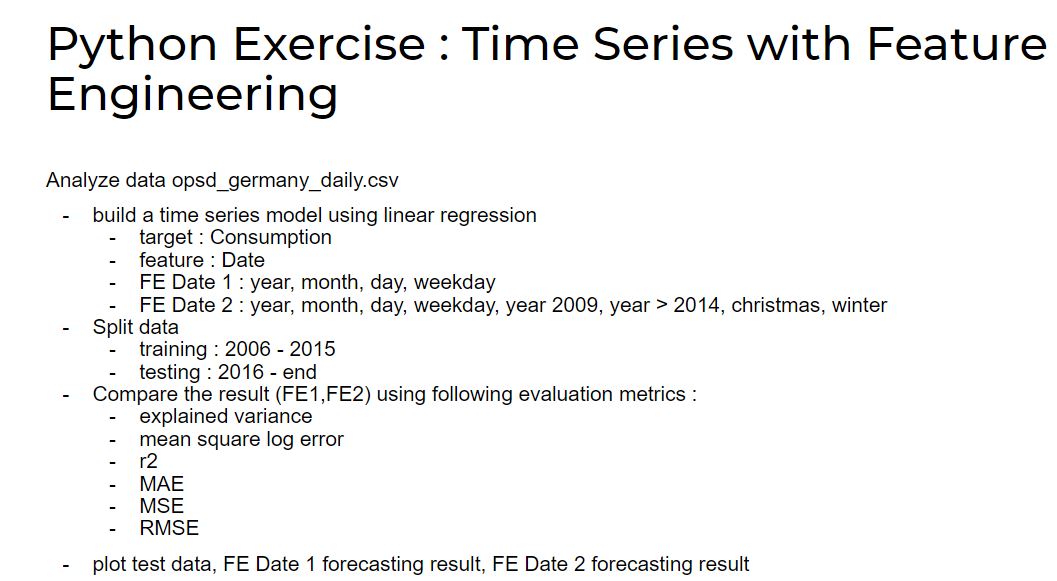

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

In [ ]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")

In [ ]:
df

Date  Consumption     Wind   Solar  Wind+Solar
0     2006-01-01   1069.18400      NaN     NaN         NaN
1     2006-01-02   1380.52100      NaN     NaN         NaN
2     2006-01-03   1442.53300      NaN     NaN         NaN
3     2006-01-04   1457.21700      NaN     NaN         NaN
4     2006-01-05   1477.13100      NaN     NaN         NaN
...          ...          ...      ...     ...         ...
4378  2017-12-27   1263.94091  394.507  16.530     411.037
4379  2017-12-28   1299.86398  506.424  14.162     520.586
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]

In [ ]:
df.isnull().sum()

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

> ## Date Feature Engineering

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

Date  Consumption     Wind   Solar  Wind+Solar
0    2006-01-01   1069.18400      NaN     NaN         NaN
1    2006-01-02   1380.52100      NaN     NaN         NaN
2    2006-01-03   1442.53300      NaN     NaN         NaN
3    2006-01-04   1457.21700      NaN     NaN         NaN
4    2006-01-05   1477.13100      NaN     NaN         NaN
...         ...          ...      ...     ...         ...
4378 2017-12-27   1263.94091  394.507  16.530     411.037
4379 2017-12-28   1299.86398  506.424  14.162     520.586
4380 2017-12-29   1295.08753  584.277  29.854     614.131
4381 2017-12-30   1215.44897  721.247   7.467     728.714
4382 2017-12-31   1107.11488  721.176  19.980     741.156

[4383 rows x 5 columns]

In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday

In [ ]:
df[['Date','year','month','day','weekday']]

Date  year  month  day  weekday
0    2006-01-01  2006      1    1        6
1    2006-01-02  2006      1    2        0
2    2006-01-03  2006      1    3        1
3    2006-01-04  2006      1    4        2
4    2006-01-05  2006      1    5        3
...         ...   ...    ...  ...      ...
4378 2017-12-27  2017     12   27        2
4379 2017-12-28  2017     12   28        3
4380 2017-12-29  2017     12   29        4
4381 2017-12-30  2017     12   30        5
4382 2017-12-31  2017     12   31        6

[4383 rows x 5 columns]

In [ ]:
cat_features = ['month','day','weekday']

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),cat_features)],
                                 remainder = 'passthrough'
                                )

> ## EDA

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



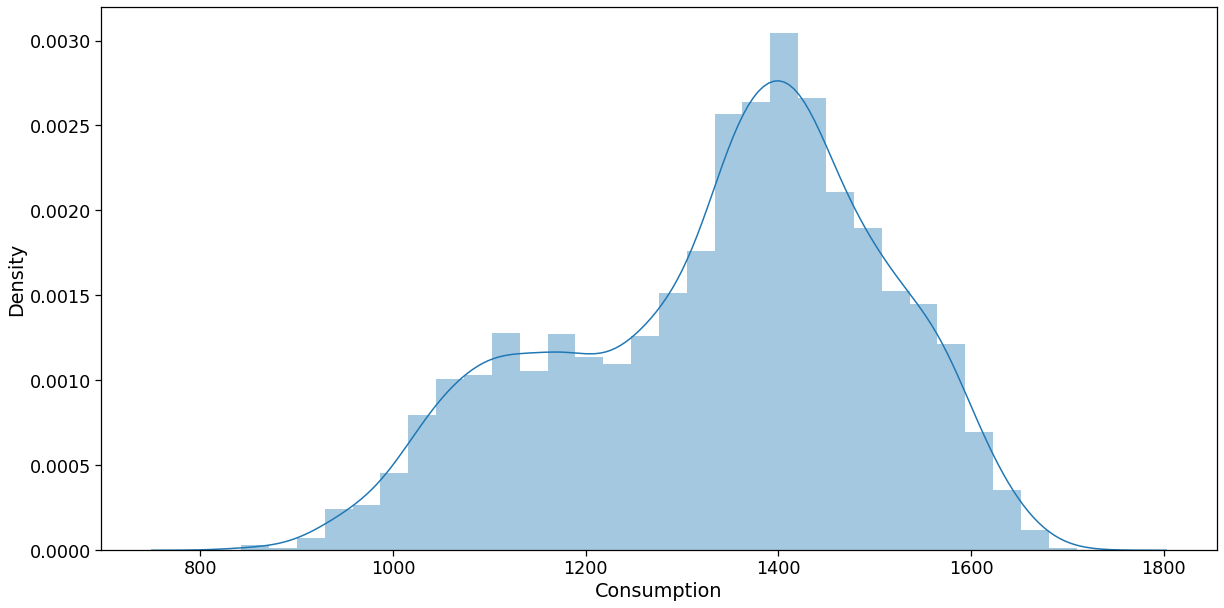

In [ ]:
sns.distplot(df["Consumption"])

In [ ]:
import plotly.express as px

fig = go.Figure([go.Scatter(name = 'true',x=df['Date'], y=df['Consumption'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
df[~df['Wind'].isnull()]

Date  Consumption     Wind   Solar  ...  year  month  day  weekday
1461 2010-01-01   1057.37200   48.709     NaN  ...  2010      1    1        4
1462 2010-01-02   1161.04200   24.628     NaN  ...  2010      1    2        5
1463 2010-01-03   1132.06900   22.963     NaN  ...  2010      1    3        6
1464 2010-01-04   1346.25000   59.318     NaN  ...  2010      1    4        0
1465 2010-01-05   1457.37400   41.624     NaN  ...  2010      1    5        1
...         ...          ...      ...     ...  ...   ...    ...  ...      ...
4378 2017-12-27   1263.94091  394.507  16.530  ...  2017     12   27        2
4379 2017-12-28   1299.86398  506.424  14.162  ...  2017     12   28        3
4380 2017-12-29   1295.08753  584.277  29.854  ...  2017     12   29        4
4381 2017-12-30   1215.44897  721.247   7.467  ...  2017     12   30        5
4382 2017-12-31   1107.11488  721.176  19.980  ...  2017     12   31        6

[2920 rows x 9 columns]

In [ ]:
df[~df['Solar'].isnull()]

Date  Consumption     Wind   Solar  ...  year  month  day  weekday
2191 2012-01-01    948.12800  227.465   6.587  ...  2012      1    1        6
2192 2012-01-02   1269.58100  207.327   6.574  ...  2012      1    2        0
2193 2012-01-03   1334.74500  473.468  24.679  ...  2012      1    3        1
2194 2012-01-04   1347.13600  499.804  14.681  ...  2012      1    4        2
2195 2012-01-05   1376.65800  523.851   5.071  ...  2012      1    5        3
...         ...          ...      ...     ...  ...   ...    ...  ...      ...
4378 2017-12-27   1263.94091  394.507  16.530  ...  2017     12   27        2
4379 2017-12-28   1299.86398  506.424  14.162  ...  2017     12   28        3
4380 2017-12-29   1295.08753  584.277  29.854  ...  2017     12   29        4
4381 2017-12-30   1215.44897  721.247   7.467  ...  2017     12   30        5
4382 2017-12-31   1107.11488  721.176  19.980  ...  2017     12   31        6

[2188 rows x 9 columns]

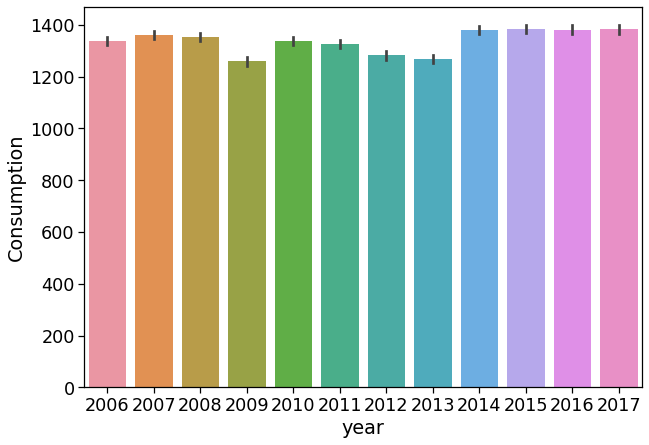

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'year', y = 'Consumption', data = df)

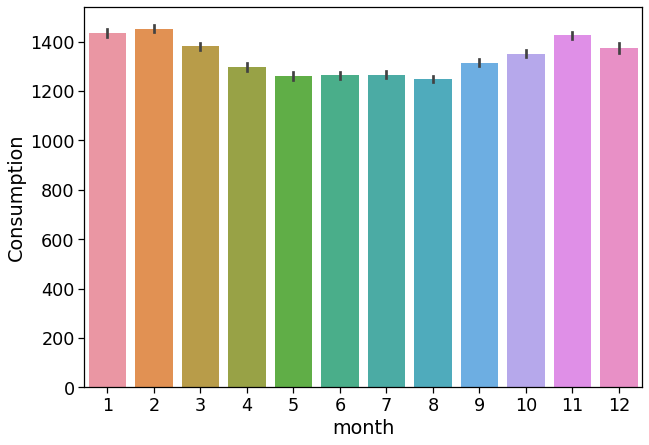

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'month', y = 'Consumption', data = df)

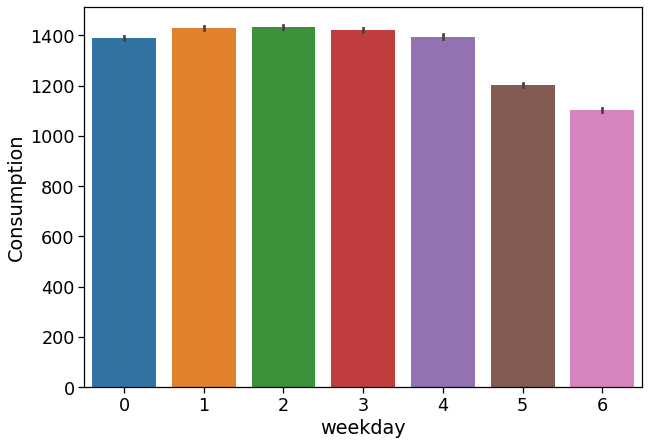

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'weekday', y = 'Consumption', data = df)

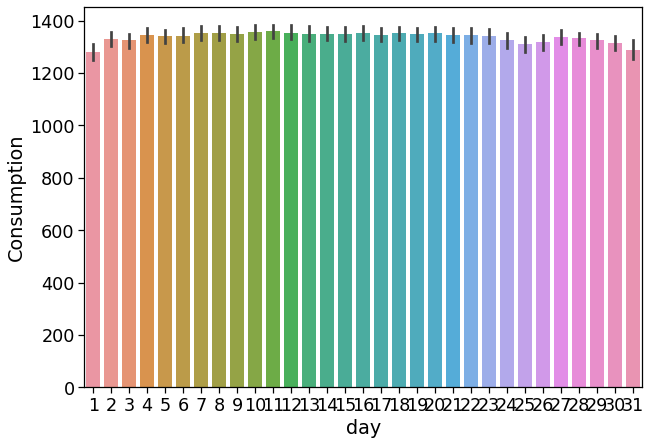

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = 'day', y = 'Consumption', data = df)

> ## Modeling Bench Mark

Data Splitting

In [ ]:
df_train = df[df['year'] < 2016 ] 
X_train = df_train[['year','month','day','weekday']]
y_train = df_train['Consumption']

df_test = df[df['year'] >= 2016 ]
X_test = df_test[['year','month','day','weekday']]
y_test = df_test['Consumption']

In [ ]:
transformer.fit(X_train)
X_train_preprocessed = transformer.transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [ ]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))\

    sns.scatterplot(y_pred,y_true-y_pred)

In [ ]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred_train = model.predict(X_train_preprocessed)
y_pred = model.predict(X_test_preprocessed)

explained_variance:  0.7287
mean_squared_log_error:  0.0046
r2:  0.7287
MAE:  61.954
MSE:  7394.1808
RMSE:  85.9894


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



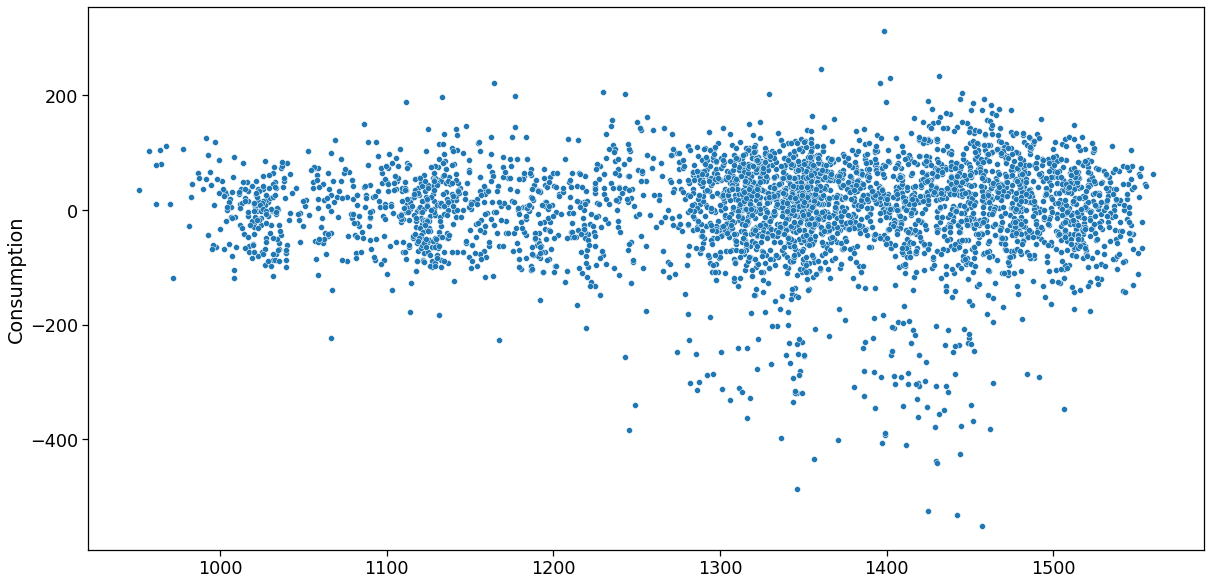

In [ ]:
regression_results(y_train, y_pred_train)

explained_variance:  0.8069
mean_squared_log_error:  0.0039
r2:  0.7239
MAE:  66.0505
MSE:  7245.0027
RMSE:  85.1176


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



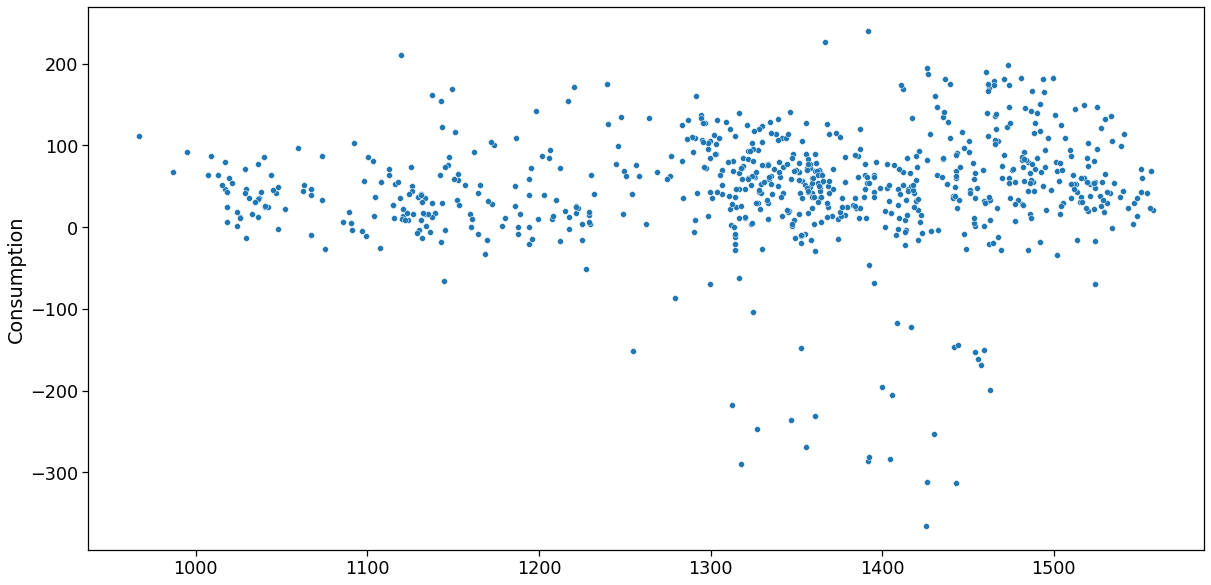

In [ ]:
regression_results(y_test, y_pred)

In [ ]:
df_test['y_pred'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = go.Figure([go.Scatter(name = 'true',x=df_test['Date'], y=df_test['Consumption'])])
fig.add_trace(go.Scatter(name = 'prediction',x=df_test['Date'], y=df_test['y_pred']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

> ## More Feature Engineering

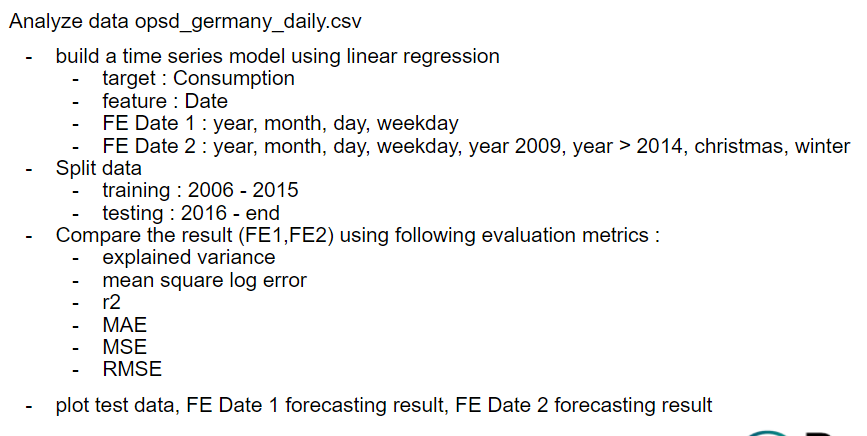

In [ ]:
df

Date  Consumption     Wind   Solar  ...  year  month  day  weekday
0    2006-01-01   1069.18400      NaN     NaN  ...  2006      1    1        6
1    2006-01-02   1380.52100      NaN     NaN  ...  2006      1    2        0
2    2006-01-03   1442.53300      NaN     NaN  ...  2006      1    3        1
3    2006-01-04   1457.21700      NaN     NaN  ...  2006      1    4        2
4    2006-01-05   1477.13100      NaN     NaN  ...  2006      1    5        3
...         ...          ...      ...     ...  ...   ...    ...  ...      ...
4378 2017-12-27   1263.94091  394.507  16.530  ...  2017     12   27        2
4379 2017-12-28   1299.86398  506.424  14.162  ...  2017     12   28        3
4380 2017-12-29   1295.08753  584.277  29.854  ...  2017     12   29        4
4381 2017-12-30   1215.44897  721.247   7.467  ...  2017     12   30        5
4382 2017-12-31   1107.11488  721.176  19.980  ...  2017     12   31        6

[4383 rows x 9 columns]

In [ ]:
df['2009'] = np.where(df['year'] == 2009,1,0)
df['>2014'] = np.where(df['year'] > 2014,1,0)

christmass = (df['month'] == 12)&((df['day'] >= 25)&(df['day'] <= 31))|(df['month'] == 1)&((df['day'] >= 1)&(df['day'] <= 7))
df['christmass'] = np.where(christmass,1,0)

winter = df['month'].isin([12,1,2,3])
df['winter'] = np.where(winter,1,0)

In [ ]:
df

Date  Consumption     Wind   Solar  ...  2009  >2014  christmass  winter
0    2006-01-01   1069.18400      NaN     NaN  ...     0      0           1       1
1    2006-01-02   1380.52100      NaN     NaN  ...     0      0           1       1
2    2006-01-03   1442.53300      NaN     NaN  ...     0      0           1       1
3    2006-01-04   1457.21700      NaN     NaN  ...     0      0           1       1
4    2006-01-05   1477.13100      NaN     NaN  ...     0      0           1       1
...         ...          ...      ...     ...  ...   ...    ...         ...     ...
4378 2017-12-27   1263.94091  394.507  16.530  ...     0      1           1       1
4379 2017-12-28   1299.86398  506.424  14.162  ...     0      1           1       1
4380 2017-12-29   1295.08753  584.277  29.854  ...     0      1           1       1
4381 2017-12-30   1215.44897  721.247   7.467  ...     0      1           1       1
4382 2017-12-31   1107.11488  721.176  19.980  ...     0      1           1       1

[4383 rows x 13 columns]

In [ ]:
df_train = df[df['year'] < 2016 ] 
X_train = df_train[['year','month','day','weekday','2009','>2014','christmass','winter']]
y_train = df_train['Consumption']

df_test = df[df['year'] >= 2016 ]
X_test = df_test[['year','month','day','weekday','2009','>2014','christmass','winter']]
y_test = df_test['Consumption']

In [ ]:
transformer.fit(X_train)
X_train_preprocessed = transformer.transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)
y_pred_train = model.predict(X_train_preprocessed)
y_pred_2 = model.predict(X_test_preprocessed)

explained_variance:  0.81
mean_squared_log_error:  0.0033
r2:  0.81
MAE:  49.6287
MSE:  5179.4544
RMSE:  71.9684


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



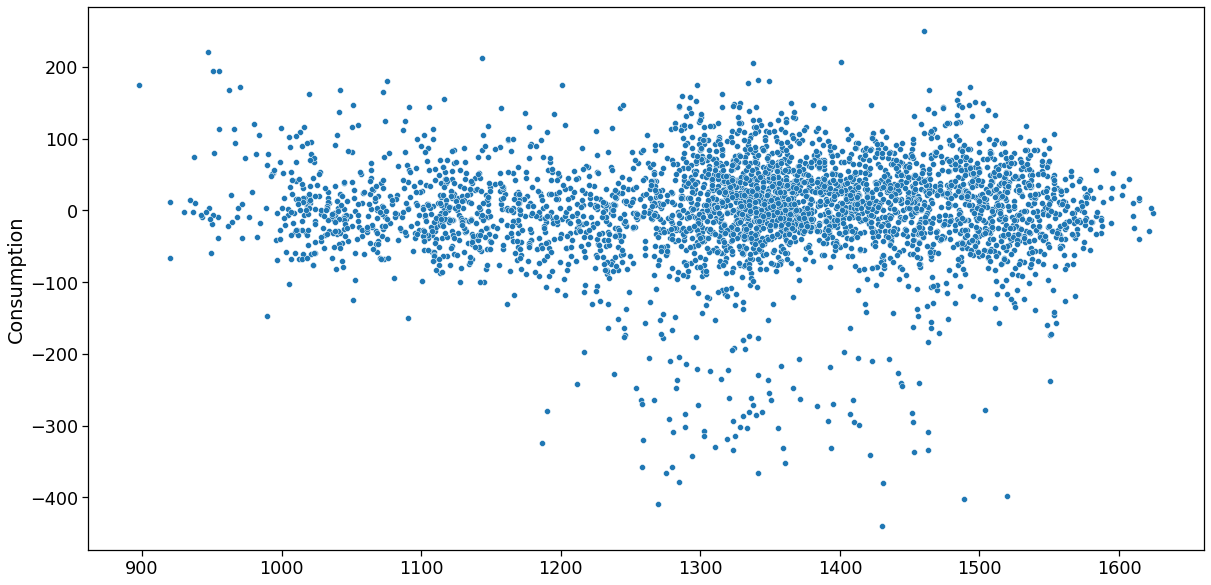

In [ ]:
regression_results(y_train, y_pred_train)

explained_variance:  0.8527
mean_squared_log_error:  0.0022
r2:  0.8516
MAE:  41.576
MSE:  3893.864
RMSE:  62.4008


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



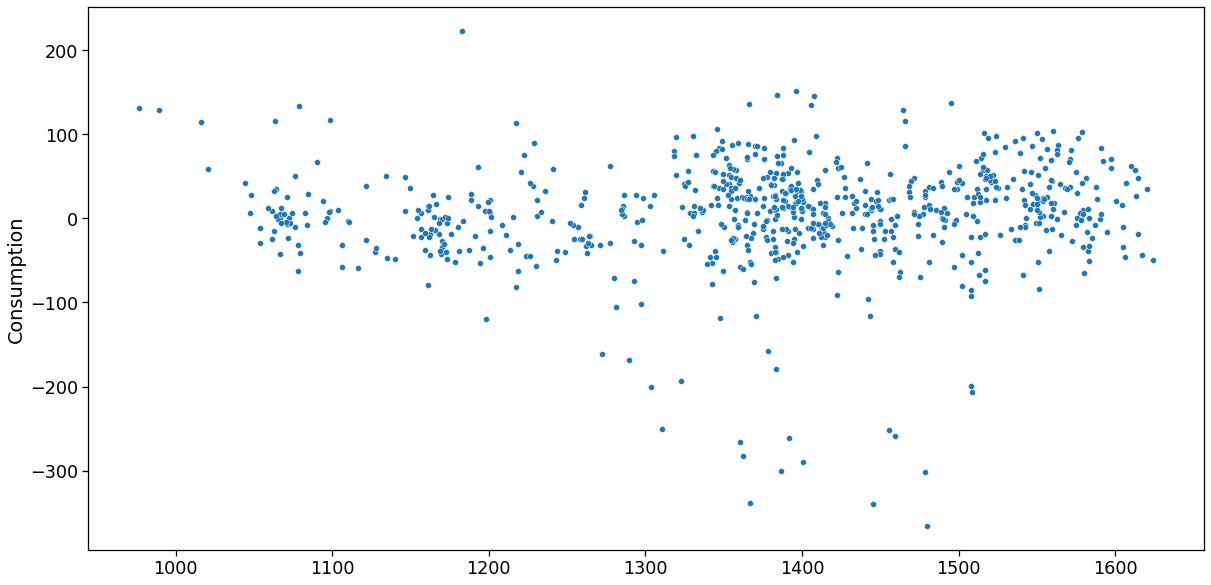

In [ ]:
regression_results(y_test, y_pred_2)

> ## Before After

BEFORE

explained_variance:  0.8069
mean_squared_log_error:  0.0039
r2:  0.7239
MAE:  66.0505
MSE:  7245.0027
RMSE:  85.1176


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



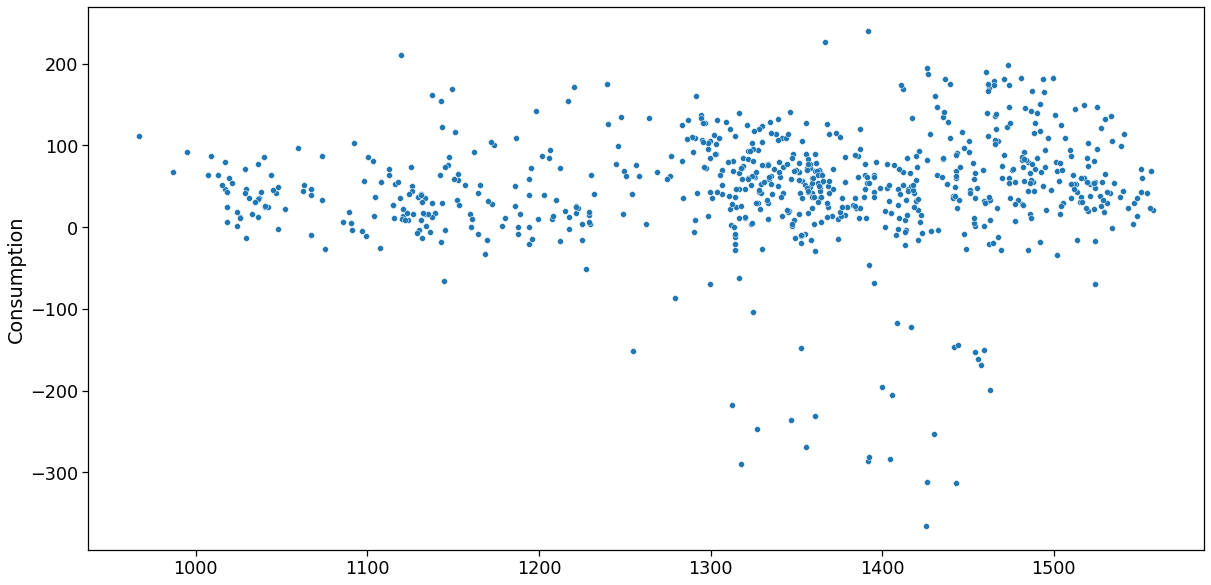

In [ ]:
regression_results(y_test, y_pred)

AFTER

explained_variance:  0.8527
mean_squared_log_error:  0.0022
r2:  0.8516
MAE:  41.576
MSE:  3893.864
RMSE:  62.4008


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



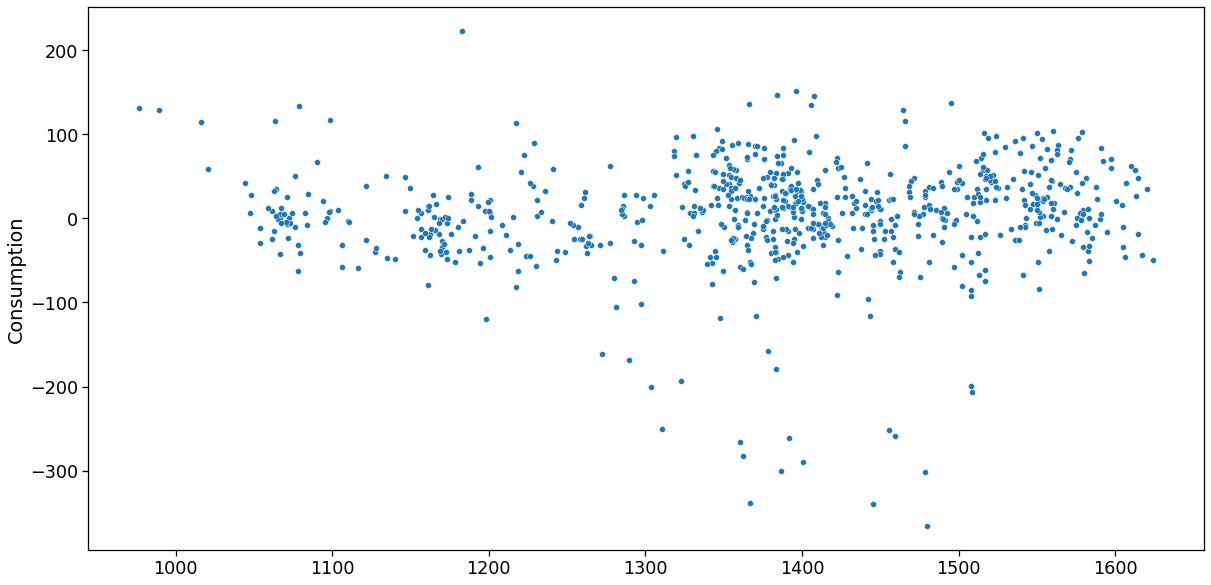

In [ ]:
regression_results(y_test, y_pred_2)

In [ ]:
df_test['y_pred'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_test['y_pred_2'] = y_pred_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = go.Figure([go.Scatter(name = 'true value',x=df_test['Date'], y=df_test['Consumption'])])
fig.add_trace(go.Scatter(name = 'forecast FE Date 1',x=df_test['Date'], y=df_test['y_pred']))
fig.add_trace(go.Scatter(name = 'forecast FE Date 2',x=df_test['Date'], y=df_test['y_pred_2']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Python Exercise : Time Series Evaluation


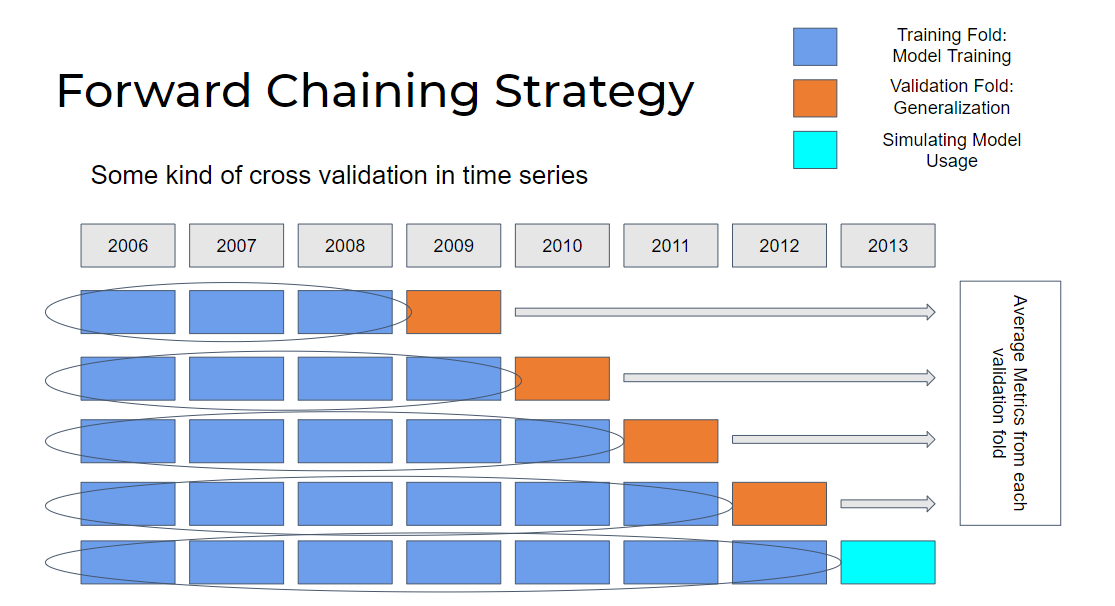

Models we will try:
1. linear regression
1. ridge regression
1. lasso regression
1. elastic net
1. SVR

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

Ridge: 0.688668 (0.124310)
Lasso: 0.689898 (0.121739)
E-Net: 0.218973 (0.097753)
SVR: -0.019511 (0.059007)
KNN: 0.553557 (0.061469)


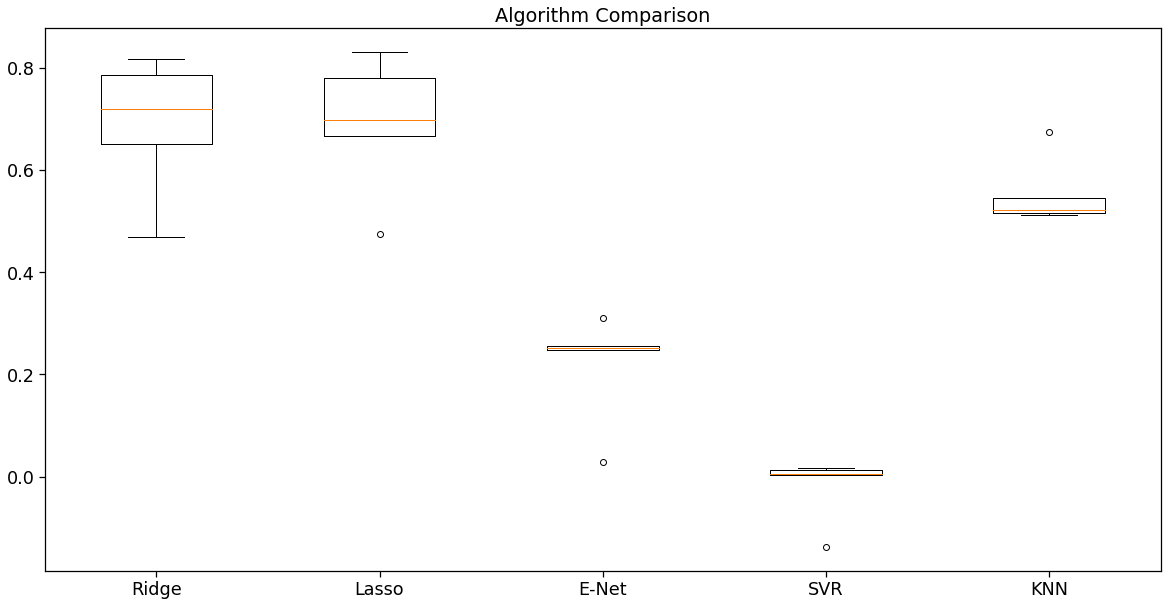

In [ ]:
models = []
models.append(('Ridge', Ridge())) 
models.append(('Lasso', Lasso()))
models.append(('E-Net', ElasticNet()))
models.append(('SVR', SVR(gamma='auto')))
models.append(('KNN', KNeighborsRegressor())) 

# Evaluate each model in turn
results = []
names = []
for name, model in models:
  # TimeSeries Cross validation
  tscv = TimeSeriesSplit(n_splits=5)
    
  cv_results = cross_val_score(model, X_train_preprocessed, y_train, cv=tscv, scoring='r2')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

> ## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
model = Ridge()
pipe_model = Pipeline([
                       ('preprocess',transformer),
                       ('model',model)
])

param_search = {
    'model__alpha':[1000,100,10,1,0.1,0.01,0.001,0.0001]
}

tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(
    estimator = pipe_model,
    cv = tscv,
    param_grid = param_search,
    scoring = 'r2'
)

In [ ]:
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_parameter = gsearch.best_params_
best_model = gsearch.best_estimator_

In [ ]:
print('best score',best_score)
print('best_parameter',best_parameter)
print('best model',best_model)

best score 0.6886682616931525
best_parameter {'model__alpha': 1}
best model Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['month', 'day', 'weekday'])],
                                   verbose=False)),
                ('model',
                 Ridge(alpha=1

In [ ]:
best_model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['month', 'day', 'weekday'])],
                                   verbose=False)),
                ('model',
                 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                       nor

In [ ]:
y_pred_3 = best_model.predict(X_test)

explained_variance:  0.8527
mean_squared_log_error:  0.0022
r2:  0.8515
MAE:  41.5988
MSE:  3895.8898
RMSE:  62.4171


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



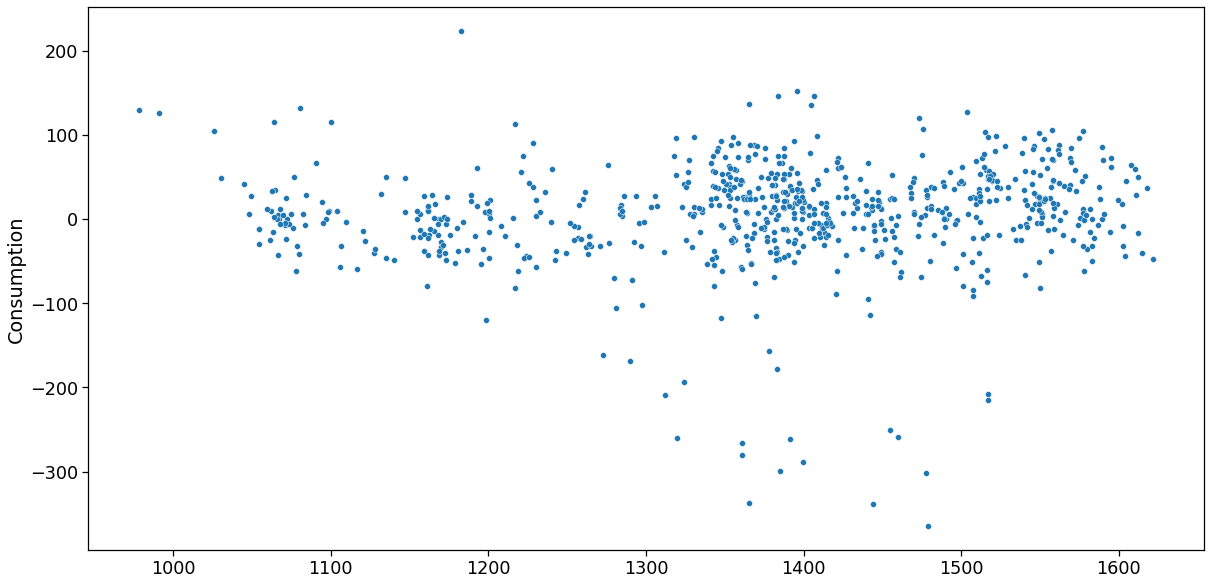

In [ ]:
regression_results(y_test, y_pred_3)

In [ ]:
df_test['y_pred_3'] = y_pred_3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = go.Figure([go.Scatter(name = 'true value',x=df_test['Date'], y=df_test['Consumption'])])
fig.add_trace(go.Scatter(name = 'forecast FE Date 1',x=df_test['Date'], y=df_test['y_pred']))
fig.add_trace(go.Scatter(name = 'forecast FE Date 2',x=df_test['Date'], y=df_test['y_pred_2']))
fig.add_trace(go.Scatter(name = 'forecast FE Date 2 Tuned Model',x=df_test['Date'], y=df_test['y_pred_3']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()